In [ ]:
#import all the required libraries
import numpy as np
import pandas as pd
import cv2
import os
import shutil
import random

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras


from PIL import Image
from tqdm import tqdm
tf.get_logger().setLevel('ERROR')

# import command for sequential layer
from tensorflow.keras import models, layers
from keras.models import load_model

from tensorflow.python.keras.models import Sequential
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications import ResNet50

# dense,flaten and pooling layers
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import RMSprop,Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from tqdm import tqdm
tf.get_logger().setLevel('ERROR')

from tensorflow.keras import models, layers
from keras.models import load_model


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/kaggle-medicine/Training_set.csv')

In [ ]:
df

,filename,label
0,Image_1.jpg,Bioflu
1,Image_2.jpg,Bactidol
2,Image_3.jpg,Fish Oil
3,Image_4.jpg,Fish Oil
4,Image_5.jpg,Bioflu
...,...,...
6995,Image_6996.jpg,Alaxan
6996,Image_6997.jpg,DayZinc
6997,Image_6998.jpg,Medicol
6998,Image_6999.jpg,Bactidol


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  7000 non-null   object
 1   label     7000 non-null   object
dtypes: object(2)
memory usage: 109.5+ KB


In [ ]:
BATCH_SIZE =52
IMAGE_SIZE = 300

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/kaggle-medicine/Sorted Training Dataset",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)


Found 7000 files belonging to 10 classes.


In [ ]:
class_names = dataset.class_names
class_names

['Alaxan',
 'Bactidol',
 'Bioflu',
 'Biogesic',
 'DayZinc',
 'Decolgen',
 'Fish Oil',
 'Kremil S',
 'Medicol',
 'Neozep']

In [ ]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)

(52, 300, 300, 3)


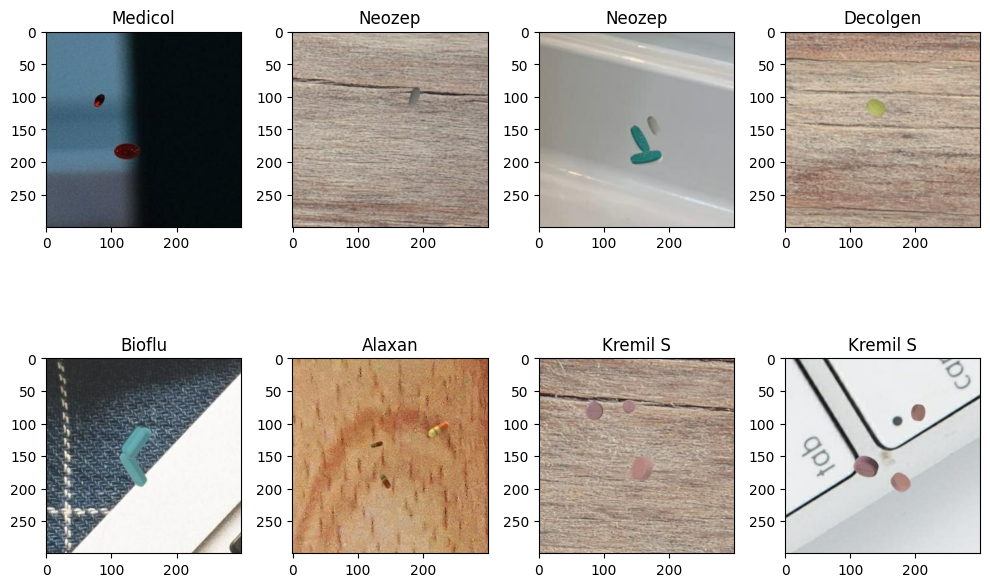

In [ ]:
plt.figure(figsize=(10, 10))
num_images_to_plot = 8

for _ in range(num_images_to_plot):
    image_batch, label_batch = next(iter(dataset))
    num_images_in_batch = image_batch.shape[0]
    random_index = np.random.randint(0, num_images_in_batch)
    ax = plt.subplot(3, 4, _ + 1)
    plt.imshow(image_batch[random_index].numpy().astype('uint8'))
    plt.title(class_names[label_batch[random_index]])

plt.tight_layout()
plt.show()

In [ ]:
# divide the dataset into training and validation

def get_data_partition(ds,training_size=0.7,val_size=0.3):
  # taking length of dataset
  len_ds=len(ds)

  # taking length of partition
  training=int(len_ds*training_size)
  val=int(len_ds*val_size)
   ## Taking values of partition
  train_ds=ds.take(training)
  val_ds=ds.skip(training).take(val)

  return train_ds, val_ds

In [ ]:
train_ds, val_ds = get_data_partition(dataset)

In [ ]:
# importing resizing and rescaling using keras
resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.Rescaling(1./255),
])

In [ ]:
# Apply the resizing and rescaling on train_ds and val_ds
train_ds = train_ds.map(
    lambda x, y: (resize_and_rescale(x, training=True), y)
    )

val_ds= val_ds.map(
    lambda x, y: (resize_and_rescale(x, training=True), y)
    )

# Visualizing the Accuracy of Models by Pretrained saved model and Model History Path

In [ ]:
class_names= ['Alaxan',
 'Bactidol',
 'Bioflu',
 'Biogesic',
 'DayZinc',
 'Decolgen',
 'Fish Oil',
 'Kremil S',
 'Medicol',
 'Neozep']

In [ ]:
# Function to load the saved model and its training history

def load_model_and_history(model_path, history_path):
    model = keras.models.load_model(model_path)
    history = np.load(history_path, allow_pickle='TRUE').item()
    return model, history

# Paths to saved models and their training history
model1_path = '/content/drive/MyDrive/kaggle-medicine/Final_Models/CNN_Model.keras'
model1_history_path = '/content/drive/MyDrive/kaggle-medicine/Final_Models/CNN_training_history.npy'

model2_path = '/content/drive/MyDrive/kaggle-medicine/Final_Models/VGG19_model3.h5'
model2_history_path = '/content/drive/MyDrive/kaggle-medicine/Final_Models/vgg19_training_history3.npy'

model3_path = '/content/drive/MyDrive/kaggle-medicine/Final_Models/Inceptionresnetv2_model_100.keras'
model3_history_path = '/content/drive/MyDrive/kaggle-medicine/Final_Models/inceptionresnetv2_training_history_100.npy'

# Load models and their training history
model1, history1 = load_model_and_history(model1_path, model1_history_path)
model2, history2 = load_model_and_history(model2_path, model2_history_path)
model3, history3 = load_model_and_history(model3_path, model3_history_path)



In [ ]:
# Print validation accuracy for each model
print("CNN Validation Accuracy:", history1['val_accuracy'][-1])
print("VGG19 Validation Accuracy:", history2['val_accuracy'][-1])
print("InceptionResnetv2 Validation Accuracy:", history3['val_accuracy'][-1])

CNN Validation Accuracy: 0.9523121118545532
VGG19 Validation Accuracy: 0.8186416029930115
InceptionResnetv2 Validation Accuracy: 0.8359826803207397


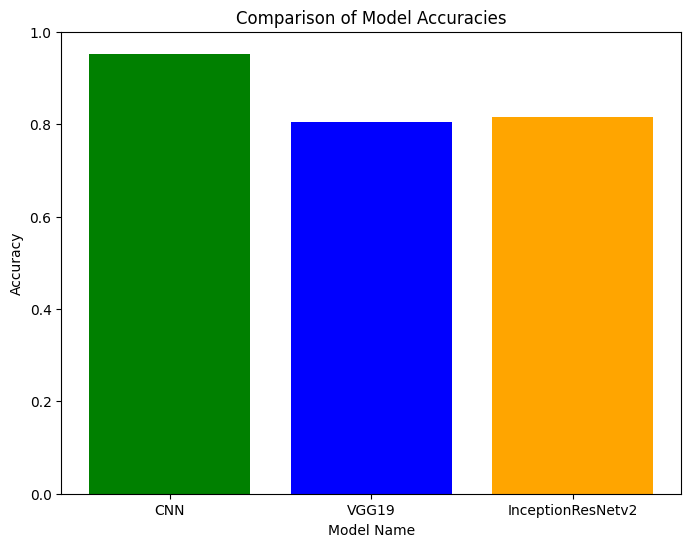

In [ ]:
models = ['CNN','VGG19', 'InceptionResNetv2']
accuracies = [history1['val_accuracy'][-1], history2['val_accuracy'][-1], history3['val_accuracy'][-1]]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=["Green",'blue', 'orange'])
plt.xlabel('Model Name')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1)  # Limit y-axis to range between 0 and 1
plt.show()

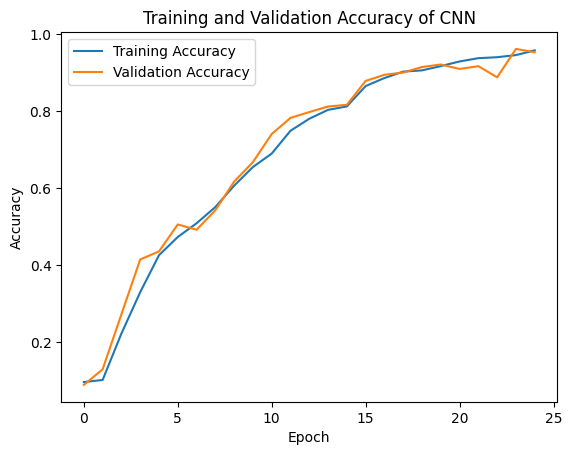

In [ ]:
# Plot training and validation accuracy
plt.plot(history1['accuracy'], label='Training Accuracy')
plt.plot(history1['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy of CNN')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

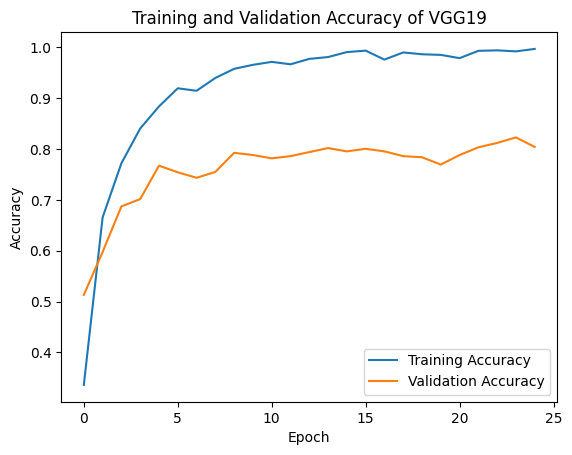

In [ ]:
# Plot training and validation accuracy
plt.plot(history2['accuracy'], label='Training Accuracy')
plt.plot(history2['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy of VGG19')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

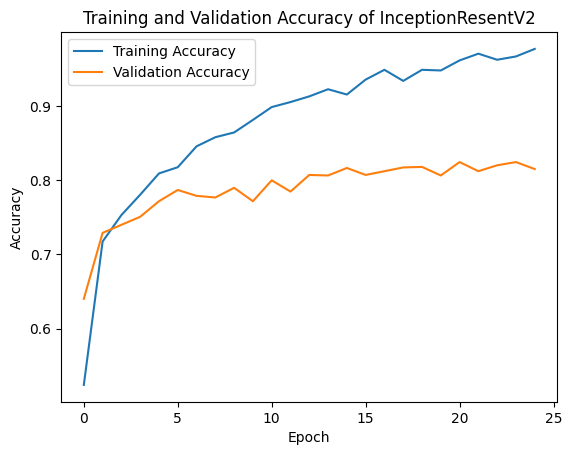

In [ ]:
# Plot training and validation accuracy
plt.plot(history3['accuracy'], label='Training Accuracy')
plt.plot(history3['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy of InceptionResentV2')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

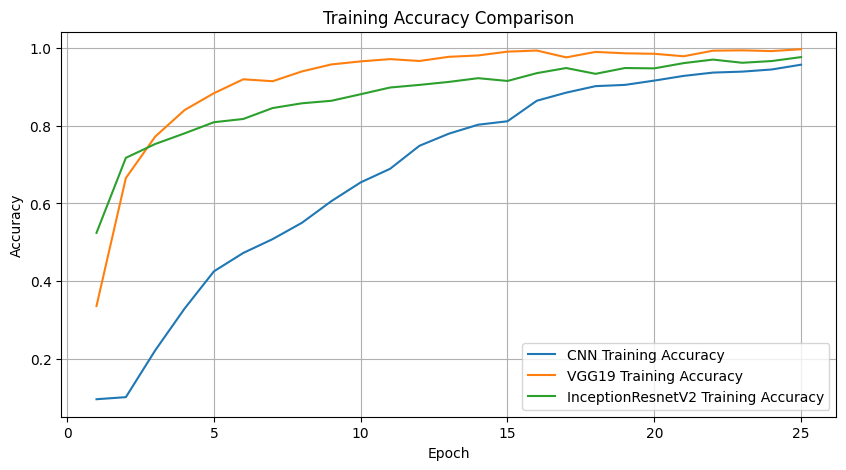

In [ ]:
# Print validation accuracy for each model and plot
plt.figure(figsize=(10, 5))

# Model 1
plt.plot(range(1, len(history1['accuracy']) + 1), history1['accuracy'], label='CNN Training Accuracy')

# Model 2
plt.plot(range(1, len(history2['accuracy']) + 1), history2['accuracy'], label='VGG19 Training Accuracy')

# Model 3
plt.plot(range(1, len(history3['accuracy']) + 1), history3['accuracy'], label='InceptionResnetV2 Training Accuracy')

plt.title('Training Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

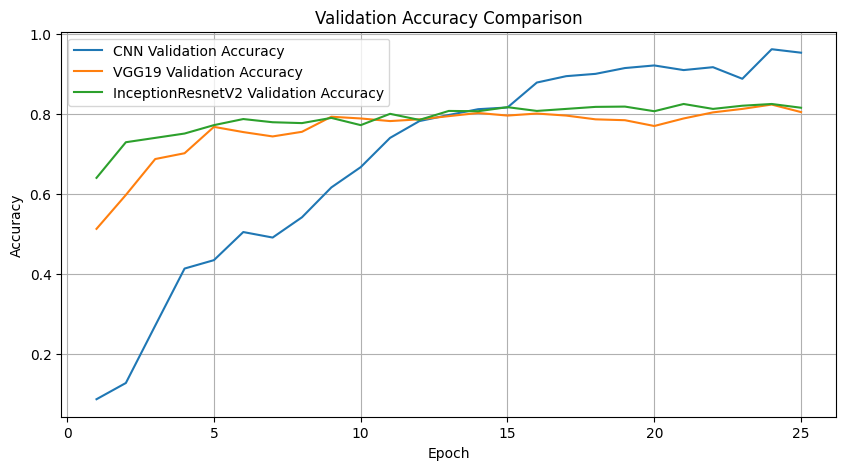

In [ ]:
# Plot validation accuracy for each model
plt.figure(figsize=(10, 5))

# Model 1
plt.plot(range(1, len(history1['val_accuracy']) + 1), history1['val_accuracy'], label='CNN Validation Accuracy')

# Model 2
plt.plot(range(1, len(history2['val_accuracy']) + 1), history2['val_accuracy'], label='VGG19 Validation Accuracy')

# Model 3
plt.plot(range(1, len(history3['val_accuracy']) + 1), history3['val_accuracy'], label='InceptionResnetV2 Validation Accuracy')

plt.title('Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Convert the dataset to numpy arrays for evaluation
X_test, y_test = [], []
for x, y in val_ds:
    X_test.append(x.numpy())
    y_test.append(y.numpy())

X_test = np.concatenate(X_test, axis=0)
y_test = np.concatenate(y_test, axis=0)

In [ ]:
def model_evaluation(model):

    pred= model.predict(X_test)

    labels = np.argmax(pred, axis=1)


    CNN_accuracy = accuracy_score(y_test, labels)
    precision = precision_score(y_test, labels, average='macro')
    recall = recall_score(y_test, labels, average='macro')
    f1 = f1_score(y_test, labels, average='macro')


    print("Accuracy on test:", CNN_accuracy)
    print("Precision on test:", precision)
    print("Recall on test:", recall)
    print("F1 Score on test:", f1)

In [ ]:
model_evaluation(model1)

# Predicting the Names of Pharmaceutical Drugs and plotting both the images side by side to cross verify.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


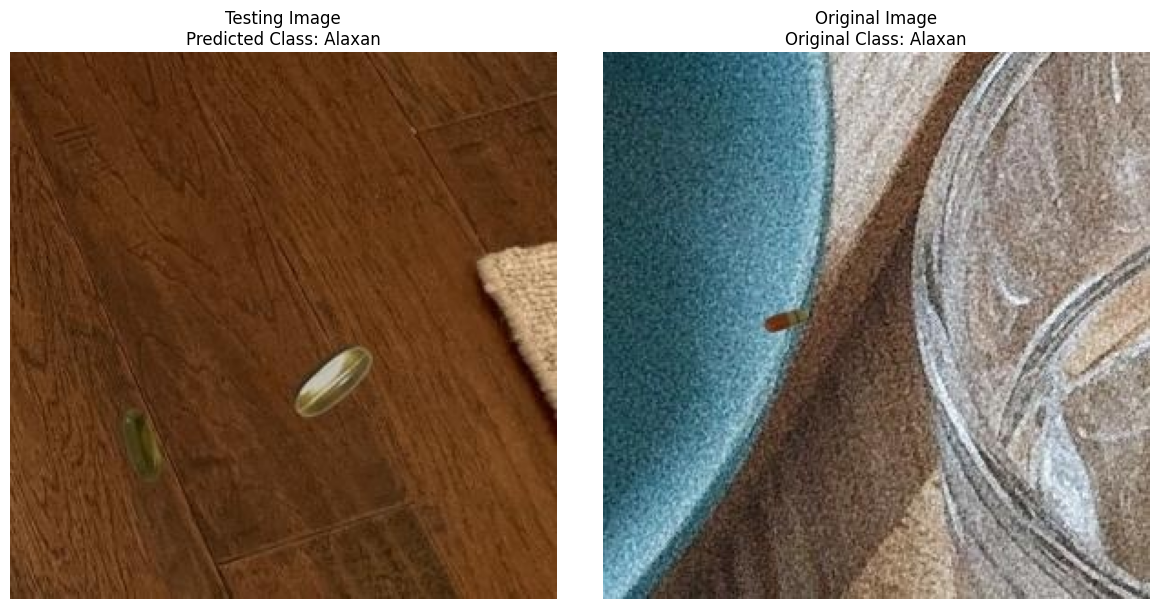

In [ ]:
def preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((300, 300))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = img / 255.0
    img = img.astype('float32')
    return img

# Load and preprocess the testing image
testing_image_path = '/content/drive/MyDrive/kaggle-medicine/test/Image_1105.jpg'
testing_image = preprocess_image(testing_image_path)

# Make predictions
testing_image_input = np.expand_dims(testing_image, axis=0)
predictions = model2.predict(testing_image_input)
predicted_class_index = tf.argmax(predictions, axis=1)[0].numpy()
predicted_class_name = class_names[predicted_class_index]


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(testing_image)
plt.title(f'Testing Image\nPredicted Class: {predicted_class_name}')
plt.axis('off')

# Find original image based on predicted class name
original_image_folder = '/content/drive/MyDrive/kaggle-medicine/Sorted_Training_Dataset'
predicted_class_folder = os.path.join(original_image_folder, predicted_class_name)
class_images = os.listdir(predicted_class_folder)

if class_images:
    original_image_path = os.path.join(predicted_class_folder, class_images[1])
    original_image = Image.open(original_image_path)

    # Plot the original image
    plt.subplot(1, 2, 2)
    plt.imshow(original_image)
    original_class_name = os.path.basename(predicted_class_folder)
    plt.title(f'Original Image\nOriginal Class: {original_class_name}')
    plt.axis('off')
else:
    print("No original images found for the predicted class:", predicted_class_name)

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step


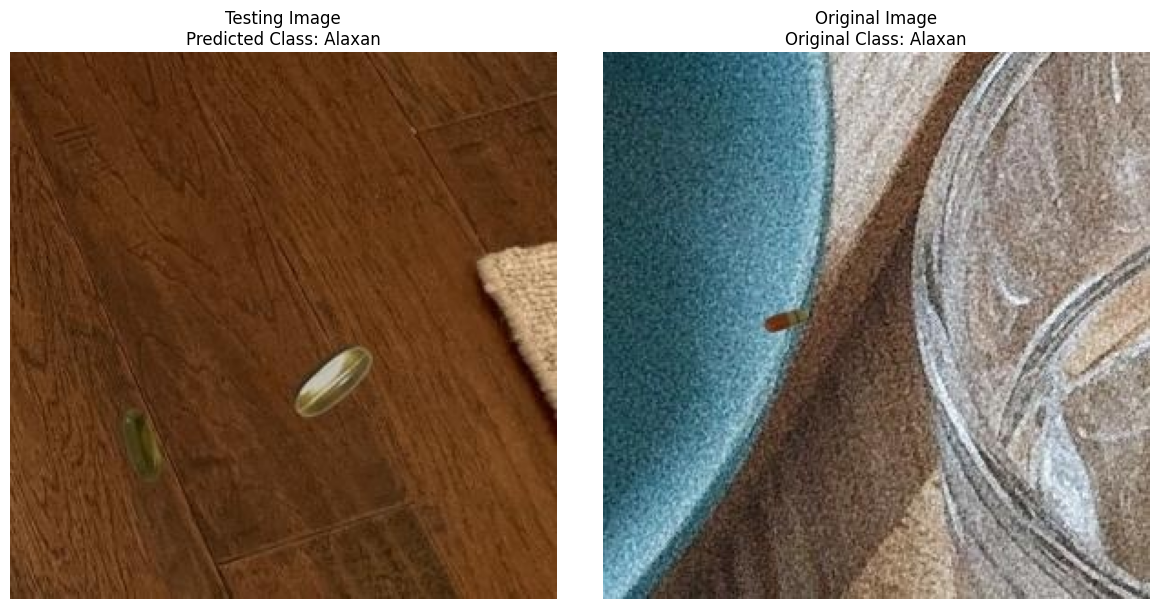

In [ ]:
import tensorflow as tf
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
from scipy import stats

def preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((300, 300))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = img / 255.0
    img = img.astype('float32')
    return img

# Load and preprocess the testing image
testing_image_path = '/content/drive/MyDrive/kaggle-medicine/test/Image_1105.jpg'
testing_image = preprocess_image(testing_image_path)

# Make predictions using 3 pre-trained models
testing_image_input = np.expand_dims(testing_image, axis=0)

# Model 1 prediction
predictions_model1 = model1.predict(testing_image_input)
predicted_class_index_model1 = tf.argmax(predictions_model1, axis=1)[0].numpy()

# Model 2 prediction
predictions_model2 = model2.predict(testing_image_input)
predicted_class_index_model2 = tf.argmax(predictions_model2, axis=1)[0].numpy()

# Model 3 prediction
predictions_model3 = model3.predict(testing_image_input)
predicted_class_index_model3 = tf.argmax(predictions_model3, axis=1)[0].numpy()

# Majority voting on predictions
predicted_classes = [predicted_class_index_model1, predicted_class_index_model2, predicted_class_index_model3]
majority_class_index = stats.mode(predicted_classes)[0]

# Get the predicted class name
predicted_class_name = class_names[majority_class_index]

# Plot the testing image with the predicted class name
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(testing_image)
plt.title(f'Testing Image\nPredicted Class: {predicted_class_name}')
plt.axis('off')

# Find original image based on the predicted class name
original_image_folder = '/content/drive/MyDrive/kaggle-medicine/Sorted Training Dataset'
predicted_class_folder = os.path.join(original_image_folder, predicted_class_name)
class_images = os.listdir(predicted_class_folder)

if class_images:
    original_image_path = os.path.join(predicted_class_folder, class_images[1])
    original_image = Image.open(original_image_path)

    # Plot the original image
    plt.subplot(1, 2, 2)
    plt.imshow(original_image)
    original_class_name = os.path.basename(predicted_class_folder)
    plt.title(f'Original Image\nOriginal Class: {original_class_name}')
    plt.axis('off')
else:
    print("No original images found for the predicted class:", predicted_class_name)

plt.tight_layout()
plt.show()


# Predicting the Name of the Drug using Saved Model and storing in the Testing CSV File with file name.

In [ ]:
import os
import pandas as pd
from PIL import Image
import tensorflow as tf
from tqdm import tqdm

# Function to preprocess an image
def preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((300, 300))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = img / 255.0
    return img

trained_model = tf.keras.models.load_model('/content/drive/MyDrive/kaggle-medicine/Final_Models/CNN_Model.keras')

def predict_and_update_csv(image_folder, csv_path):
    df = pd.read_csv(csv_path)

    # Initialize tqdm progress bar
    with tqdm(total=len(os.listdir(image_folder)), desc='Processing Images') as pbar:
        # Loop through images in the folder
        for image_file in os.listdir(image_folder):
            if image_file.endswith('.jpg') or image_file.endswith('.jpeg') or image_file.endswith('.png'):
                # Preprocess the image
                image_path = os.path.join(image_folder, image_file)
                testing_image = preprocess_image(image_path)
                testing_image = tf.expand_dims(testing_image, axis=0)

                # Make predictions
                predictions = trained_model.predict(testing_image)
                predicted_class_index = tf.argmax(predictions, axis=1)[0].numpy()
                predicted_class_name = class_names[predicted_class_index]

                # Update the CSV with the prediction
                df.loc[df['filename'] == image_file, 'Predicted_Class'] = predicted_class_name

                # Update tqdm progress bar
                pbar.update(1)

    # Save the updated CSV
    df.to_csv(csv_path, index=False)

image_folder = '/content/drive/MyDrive/kaggle-medicine/test'
csv_path = '/content/drive/MyDrive/kaggle-medicine/Testing_set.csv'
predict_and_update_csv(image_folder, csv_path)


Processing Images:   0%|          | 0/3000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 756ms/step


Processing Images:   0%|          | 1/3000 [00:01<1:11:42,  1.43s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:   0%|          | 2/3000 [00:02<46:58,  1.06it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:   0%|          | 3/3000 [00:02<39:02,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:   0%|          | 4/3000 [00:03<34:52,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:   0%|          | 5/3000 [00:03<32:28,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:   0%|          | 6/3000 [00:04<31:48,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:   0%|          | 7/3000 [00:04<30:27,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:   0%|          | 8/3000 [00:05<29:52,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:   0%|          | 9/3000 [00:06<30:35,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:   0%|          | 10/3000 [00:06<30:08,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:   0%|          | 11/3000 [00:07<30:15,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:   0%|          | 12/3000 [00:07<30:00,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:   0%|          | 13/3000 [00:08<30:57,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:   0%|          | 14/3000 [00:09<30:58,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:   0%|          | 15/3000 [00:09<30:24,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:   1%|          | 16/3000 [00:10<29:58,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:   1%|          | 17/3000 [00:10<29:17,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:   1%|          | 18/3000 [00:11<28:59,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:   1%|          | 19/3000 [00:12<29:01,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:   1%|          | 20/3000 [00:12<29:37,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:   1%|          | 21/3000 [00:13<29:08,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:   1%|          | 22/3000 [00:13<29:46,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:   1%|          | 23/3000 [00:14<29:16,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:   1%|          | 24/3000 [00:15<29:44,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:   1%|          | 25/3000 [00:15<30:35,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:   1%|          | 26/3000 [00:16<29:29,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:   1%|          | 27/3000 [00:16<30:36,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:   1%|          | 28/3000 [00:17<29:39,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:   1%|          | 29/3000 [00:18<29:22,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing Images:   1%|          | 30/3000 [00:18<29:47,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:   1%|          | 31/3000 [00:54<9:08:39, 11.09s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:   1%|          | 32/3000 [01:00<8:01:59,  9.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:   1%|          | 34/3000 [01:01<4:20:48,  5.28s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:   1%|          | 36/3000 [01:01<2:38:18,  3.20s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:   1%|▏         | 38/3000 [01:01<1:42:01,  2.07s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:   1%|▏         | 40/3000 [01:01<1:08:17,  1.38s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:   1%|▏         | 42/3000 [01:01<47:00,  1.05it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:   1%|▏         | 44/3000 [01:01<32:57,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:   2%|▏         | 46/3000 [01:01<23:33,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:   2%|▏         | 48/3000 [01:01<17:18,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:   2%|▏         | 50/3000 [01:02<12:56,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:   2%|▏         | 52/3000 [01:02<09:52,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:   2%|▏         | 54/3000 [01:02<07:48,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:   2%|▏         | 56/3000 [01:02<06:23,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:   2%|▏         | 58/3000 [01:02<05:20,  9.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:   2%|▏         | 60/3000 [01:02<04:36, 10.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:   2%|▏         | 62/3000 [01:02<04:04, 11.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:   2%|▏         | 64/3000 [01:02<03:42, 13.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:   2%|▏         | 66/3000 [01:03<03:30, 13.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:   2%|▏         | 68/3000 [01:03<03:22, 14.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:   2%|▏         | 70/3000 [01:03<03:15, 15.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:   2%|▏         | 72/3000 [01:03<03:23, 14.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:   2%|▏         | 74/3000 [01:03<03:17, 14.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:   3%|▎         | 76/3000 [01:03<03:09, 15.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:   3%|▎         | 78/3000 [01:03<03:06, 15.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:   3%|▎         | 80/3000 [01:03<03:03, 15.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:   3%|▎         | 82/3000 [01:04<03:01, 16.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:   3%|▎         | 84/3000 [01:04<03:00, 16.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:   3%|▎         | 86/3000 [01:04<02:59, 16.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:   3%|▎         | 88/3000 [01:04<02:57, 16.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:   3%|▎         | 90/3000 [01:04<02:58, 16.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:   3%|▎         | 92/3000 [01:04<02:57, 16.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:   3%|▎         | 94/3000 [01:04<02:56, 16.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:   3%|▎         | 96/3000 [01:04<02:54, 16.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:   3%|▎         | 98/3000 [01:04<02:52, 16.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:   3%|▎         | 100/3000 [01:05<02:51, 16.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:   3%|▎         | 102/3000 [01:05<02:52, 16.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:   3%|▎         | 104/3000 [01:05<02:57, 16.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:   4%|▎         | 106/3000 [01:05<02:57, 16.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:   4%|▎         | 108/3000 [01:05<02:56, 16.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:   4%|▎         | 110/3000 [01:05<02:54, 16.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:   4%|▎         | 112/3000 [01:05<02:54, 16.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:   4%|▍         | 114/3000 [01:05<03:00, 15.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:   4%|▍         | 116/3000 [01:06<03:00, 15.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:   4%|▍         | 118/3000 [01:06<02:58, 16.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:   4%|▍         | 120/3000 [01:06<03:00, 16.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:   4%|▍         | 122/3000 [01:06<03:00, 15.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:   4%|▍         | 124/3000 [01:06<02:56, 16.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:   4%|▍         | 126/3000 [01:06<02:57, 16.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:   4%|▍         | 128/3000 [01:06<02:57, 16.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:   4%|▍         | 130/3000 [01:06<02:58, 16.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:   4%|▍         | 132/3000 [01:07<02:58, 16.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:   4%|▍         | 134/3000 [01:07<02:59, 15.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing Images:   5%|▍         | 136/3000 [01:07<03:01, 15.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:   5%|▍         | 138/3000 [01:07<03:05, 15.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:   5%|▍         | 140/3000 [01:07<03:04, 15.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:   5%|▍         | 142/3000 [01:07<03:02, 15.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing Images:   5%|▍         | 144/3000 [01:07<03:03, 15.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:   5%|▍         | 146/3000 [01:07<03:02, 15.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:   5%|▍         | 148/3000 [01:08<03:11, 14.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:   5%|▌         | 150/3000 [01:08<03:10, 14.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:   5%|▌         | 152/3000 [01:08<03:08, 15.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:   5%|▌         | 154/3000 [01:08<03:06, 15.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:   5%|▌         | 156/3000 [01:08<03:03, 15.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:   5%|▌         | 158/3000 [01:08<03:02, 15.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:   5%|▌         | 160/3000 [01:08<03:06, 15.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:   5%|▌         | 162/3000 [01:09<03:04, 15.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:   5%|▌         | 164/3000 [01:09<03:03, 15.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:   6%|▌         | 166/3000 [01:09<03:01, 15.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:   6%|▌         | 168/3000 [01:09<03:13, 14.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:   6%|▌         | 170/3000 [01:09<03:14, 14.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:   6%|▌         | 172/3000 [01:09<03:09, 14.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing Images:   6%|▌         | 174/3000 [01:09<03:10, 14.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:   6%|▌         | 176/3000 [01:09<03:08, 14.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing Images:   6%|▌         | 178/3000 [01:10<03:11, 14.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:   6%|▌         | 180/3000 [01:10<03:10, 14.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing Images:   6%|▌         | 182/3000 [01:10<03:13, 14.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:   6%|▌         | 184/3000 [01:10<03:14, 14.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:   6%|▌         | 186/3000 [01:10<03:13, 14.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:   6%|▋         | 188/3000 [01:10<03:09, 14.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:   6%|▋         | 190/3000 [01:10<03:13, 14.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:   6%|▋         | 192/3000 [01:11<03:13, 14.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:   6%|▋         | 194/3000 [01:11<03:08, 14.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:   7%|▋         | 196/3000 [01:11<03:06, 15.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:   7%|▋         | 198/3000 [01:11<03:12, 14.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:   7%|▋         | 200/3000 [01:11<03:08, 14.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:   7%|▋         | 202/3000 [01:11<03:04, 15.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:   7%|▋         | 204/3000 [01:11<03:02, 15.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:   7%|▋         | 206/3000 [01:12<03:02, 15.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:   7%|▋         | 208/3000 [01:12<03:10, 14.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing Images:   7%|▋         | 210/3000 [01:12<03:12, 14.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing Images:   7%|▋         | 212/3000 [01:12<03:16, 14.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:   7%|▋         | 214/3000 [01:12<06:00,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:   7%|▋         | 216/3000 [01:13<05:07,  9.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:   7%|▋         | 218/3000 [01:13<04:30, 10.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:   7%|▋         | 220/3000 [01:13<04:07, 11.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:   7%|▋         | 222/3000 [01:13<03:53, 11.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:   7%|▋         | 224/3000 [01:13<03:40, 12.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:   8%|▊         | 226/3000 [01:13<03:40, 12.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:   8%|▊         | 228/3000 [01:13<03:29, 13.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:   8%|▊         | 230/3000 [01:14<03:22, 13.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:   8%|▊         | 232/3000 [01:14<03:13, 14.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:   8%|▊         | 234/3000 [01:14<03:11, 14.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:   8%|▊         | 236/3000 [01:14<03:05, 14.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:   8%|▊         | 238/3000 [01:14<02:59, 15.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:   8%|▊         | 240/3000 [01:14<02:55, 15.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:   8%|▊         | 242/3000 [01:14<02:51, 16.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:   8%|▊         | 244/3000 [01:14<02:49, 16.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:   8%|▊         | 246/3000 [01:15<02:51, 16.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:   8%|▊         | 248/3000 [01:15<02:50, 16.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing Images:   8%|▊         | 250/3000 [01:15<02:51, 16.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:   8%|▊         | 252/3000 [01:15<02:50, 16.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:   8%|▊         | 254/3000 [01:15<02:49, 16.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:   9%|▊         | 256/3000 [01:15<02:47, 16.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:   9%|▊         | 258/3000 [01:15<02:47, 16.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:   9%|▊         | 260/3000 [01:16<04:35,  9.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:   9%|▊         | 262/3000 [01:16<04:04, 11.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:   9%|▉         | 264/3000 [01:16<03:43, 12.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:   9%|▉         | 266/3000 [01:16<03:25, 13.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:   9%|▉         | 268/3000 [01:16<03:11, 14.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:   9%|▉         | 270/3000 [01:16<03:03, 14.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:   9%|▉         | 272/3000 [01:16<03:00, 15.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:   9%|▉         | 274/3000 [01:17<02:58, 15.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:   9%|▉         | 276/3000 [01:17<02:54, 15.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing Images:   9%|▉         | 278/3000 [01:17<02:54, 15.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:   9%|▉         | 280/3000 [01:17<02:56, 15.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:   9%|▉         | 282/3000 [01:17<02:54, 15.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:   9%|▉         | 284/3000 [01:17<02:53, 15.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  10%|▉         | 286/3000 [01:17<02:57, 15.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  10%|▉         | 288/3000 [01:17<02:56, 15.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  10%|▉         | 290/3000 [01:18<02:55, 15.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  10%|▉         | 292/3000 [01:18<02:54, 15.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  10%|▉         | 294/3000 [01:18<03:01, 14.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  10%|▉         | 296/3000 [01:18<03:03, 14.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  10%|▉         | 298/3000 [01:18<03:00, 15.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  10%|█         | 300/3000 [01:18<02:57, 15.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  10%|█         | 302/3000 [01:18<02:56, 15.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  10%|█         | 304/3000 [01:19<02:56, 15.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  10%|█         | 306/3000 [01:19<02:54, 15.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  10%|█         | 308/3000 [01:19<02:53, 15.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing Images:  10%|█         | 310/3000 [01:19<02:59, 14.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  10%|█         | 312/3000 [01:19<02:55, 15.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  10%|█         | 314/3000 [01:19<02:52, 15.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  11%|█         | 316/3000 [01:19<02:49, 15.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  11%|█         | 318/3000 [01:19<02:49, 15.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  11%|█         | 320/3000 [01:20<02:51, 15.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  11%|█         | 322/3000 [01:20<02:50, 15.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  11%|█         | 324/3000 [01:20<02:49, 15.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  11%|█         | 326/3000 [01:20<02:50, 15.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  11%|█         | 328/3000 [01:20<02:47, 15.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  11%|█         | 330/3000 [01:20<02:46, 16.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  11%|█         | 332/3000 [01:20<02:47, 15.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  11%|█         | 334/3000 [01:20<02:47, 15.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  11%|█         | 336/3000 [01:21<02:48, 15.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  11%|█▏        | 338/3000 [01:21<02:47, 15.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing Images:  11%|█▏        | 340/3000 [01:21<02:48, 15.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  11%|█▏        | 342/3000 [01:21<02:49, 15.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  11%|█▏        | 344/3000 [01:21<02:55, 15.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  12%|█▏        | 346/3000 [01:21<02:51, 15.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  12%|█▏        | 348/3000 [01:21<02:47, 15.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  12%|█▏        | 350/3000 [01:21<02:46, 15.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  12%|█▏        | 352/3000 [01:22<02:45, 15.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  12%|█▏        | 354/3000 [01:22<02:44, 16.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  12%|█▏        | 356/3000 [01:22<02:47, 15.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  12%|█▏        | 358/3000 [01:22<02:53, 15.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  12%|█▏        | 360/3000 [01:22<02:51, 15.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  12%|█▏        | 362/3000 [01:22<02:47, 15.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  12%|█▏        | 364/3000 [01:22<02:44, 16.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  12%|█▏        | 366/3000 [01:22<02:47, 15.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  12%|█▏        | 368/3000 [01:23<02:48, 15.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  12%|█▏        | 370/3000 [01:23<02:59, 14.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  12%|█▏        | 372/3000 [01:23<02:57, 14.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  12%|█▏        | 374/3000 [01:23<02:53, 15.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  13%|█▎        | 376/3000 [01:23<02:48, 15.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  13%|█▎        | 378/3000 [01:23<02:45, 15.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  13%|█▎        | 380/3000 [01:23<02:48, 15.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  13%|█▎        | 382/3000 [01:24<02:50, 15.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  13%|█▎        | 384/3000 [01:24<02:48, 15.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  13%|█▎        | 386/3000 [01:24<02:47, 15.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  13%|█▎        | 388/3000 [01:24<02:51, 15.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  13%|█▎        | 390/3000 [01:24<02:48, 15.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing Images:  13%|█▎        | 392/3000 [01:24<02:53, 14.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  13%|█▎        | 394/3000 [01:24<02:51, 15.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  13%|█▎        | 396/3000 [01:24<02:53, 15.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  13%|█▎        | 398/3000 [01:25<02:51, 15.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  13%|█▎        | 400/3000 [01:25<02:49, 15.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  13%|█▎        | 402/3000 [01:25<02:46, 15.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  13%|█▎        | 404/3000 [01:25<02:47, 15.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  14%|█▎        | 406/3000 [01:25<02:48, 15.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  14%|█▎        | 408/3000 [01:25<02:51, 15.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  14%|█▎        | 410/3000 [01:25<02:51, 15.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  14%|█▎        | 412/3000 [01:26<02:50, 15.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  14%|█▍        | 414/3000 [01:26<02:49, 15.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  14%|█▍        | 416/3000 [01:26<02:49, 15.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing Images:  14%|█▍        | 418/3000 [01:26<02:56, 14.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  14%|█▍        | 420/3000 [01:26<02:55, 14.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  14%|█▍        | 422/3000 [01:26<02:51, 15.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  14%|█▍        | 424/3000 [01:26<02:48, 15.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  14%|█▍        | 426/3000 [01:26<02:49, 15.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  14%|█▍        | 428/3000 [01:27<02:52, 14.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  14%|█▍        | 430/3000 [01:27<02:51, 15.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  14%|█▍        | 432/3000 [01:27<02:48, 15.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing Images:  14%|█▍        | 434/3000 [01:27<02:49, 15.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  15%|█▍        | 436/3000 [01:27<02:53, 14.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  15%|█▍        | 438/3000 [01:27<02:48, 15.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  15%|█▍        | 440/3000 [01:27<02:51, 14.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  15%|█▍        | 442/3000 [01:28<02:52, 14.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  15%|█▍        | 444/3000 [01:28<02:49, 15.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  15%|█▍        | 446/3000 [01:28<02:53, 14.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing Images:  15%|█▍        | 448/3000 [01:28<03:00, 14.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  15%|█▌        | 450/3000 [01:28<02:55, 14.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  15%|█▌        | 452/3000 [01:28<02:53, 14.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  15%|█▌        | 454/3000 [01:28<02:52, 14.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  15%|█▌        | 456/3000 [01:28<02:53, 14.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  15%|█▌        | 458/3000 [01:29<02:51, 14.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  15%|█▌        | 460/3000 [01:29<02:49, 14.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  15%|█▌        | 462/3000 [01:29<02:46, 15.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing Images:  15%|█▌        | 464/3000 [01:29<02:51, 14.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  16%|█▌        | 466/3000 [01:29<02:51, 14.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  16%|█▌        | 468/3000 [01:29<02:51, 14.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  16%|█▌        | 470/3000 [01:29<02:47, 15.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  16%|█▌        | 472/3000 [01:30<02:48, 15.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  16%|█▌        | 474/3000 [01:30<02:45, 15.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  16%|█▌        | 476/3000 [01:30<02:52, 14.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing Images:  16%|█▌        | 478/3000 [01:30<02:54, 14.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  16%|█▌        | 480/3000 [01:30<02:53, 14.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  16%|█▌        | 482/3000 [01:30<02:56, 14.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  16%|█▌        | 484/3000 [01:30<02:51, 14.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  16%|█▌        | 486/3000 [01:30<02:48, 14.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  16%|█▋        | 488/3000 [01:31<02:47, 15.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  16%|█▋        | 490/3000 [01:31<02:46, 15.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  16%|█▋        | 492/3000 [01:31<02:49, 14.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  16%|█▋        | 494/3000 [01:31<02:46, 15.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  17%|█▋        | 496/3000 [01:31<02:43, 15.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  17%|█▋        | 498/3000 [01:31<02:39, 15.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  17%|█▋        | 500/3000 [01:31<02:40, 15.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  17%|█▋        | 502/3000 [01:32<02:40, 15.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  17%|█▋        | 504/3000 [01:32<02:39, 15.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  17%|█▋        | 506/3000 [01:32<02:38, 15.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  17%|█▋        | 508/3000 [01:32<02:42, 15.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  17%|█▋        | 510/3000 [01:32<02:40, 15.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  17%|█▋        | 512/3000 [01:32<02:40, 15.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  17%|█▋        | 514/3000 [01:32<02:40, 15.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  17%|█▋        | 516/3000 [01:32<02:37, 15.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  17%|█▋        | 518/3000 [01:33<02:36, 15.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  17%|█▋        | 520/3000 [01:33<02:33, 16.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  17%|█▋        | 522/3000 [01:33<02:47, 14.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  17%|█▋        | 524/3000 [01:33<02:45, 14.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  18%|█▊        | 526/3000 [01:33<02:43, 15.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  18%|█▊        | 528/3000 [01:33<02:41, 15.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  18%|█▊        | 530/3000 [01:33<02:39, 15.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  18%|█▊        | 532/3000 [01:33<02:37, 15.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  18%|█▊        | 534/3000 [01:34<02:36, 15.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  18%|█▊        | 536/3000 [01:34<02:38, 15.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing Images:  18%|█▊        | 538/3000 [01:34<02:40, 15.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  18%|█▊        | 540/3000 [01:34<02:41, 15.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  18%|█▊        | 542/3000 [01:34<02:39, 15.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  18%|█▊        | 544/3000 [01:34<02:36, 15.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  18%|█▊        | 546/3000 [01:34<02:33, 15.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  18%|█▊        | 548/3000 [01:34<02:35, 15.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  18%|█▊        | 550/3000 [01:35<02:34, 15.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  18%|█▊        | 552/3000 [01:35<02:32, 16.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  18%|█▊        | 554/3000 [01:35<02:33, 15.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  19%|█▊        | 556/3000 [01:35<02:33, 15.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  19%|█▊        | 558/3000 [01:35<02:30, 16.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  19%|█▊        | 560/3000 [01:35<02:33, 15.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  19%|█▊        | 562/3000 [01:35<02:32, 15.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  19%|█▉        | 564/3000 [01:35<02:34, 15.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  19%|█▉        | 566/3000 [01:36<02:33, 15.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  19%|█▉        | 568/3000 [01:36<02:32, 15.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  19%|█▉        | 570/3000 [01:36<02:32, 15.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  19%|█▉        | 572/3000 [01:36<02:35, 15.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  19%|█▉        | 574/3000 [01:36<02:34, 15.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  19%|█▉        | 576/3000 [01:36<02:34, 15.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  19%|█▉        | 578/3000 [01:36<02:32, 15.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  19%|█▉        | 580/3000 [01:36<02:31, 15.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  19%|█▉        | 582/3000 [01:37<02:29, 16.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  19%|█▉        | 584/3000 [01:37<02:33, 15.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  20%|█▉        | 586/3000 [01:37<02:35, 15.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  20%|█▉        | 588/3000 [01:37<02:34, 15.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  20%|█▉        | 590/3000 [01:37<02:31, 15.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  20%|█▉        | 592/3000 [01:37<02:29, 16.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  20%|█▉        | 594/3000 [01:37<02:28, 16.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  20%|█▉        | 596/3000 [01:38<02:31, 15.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  20%|█▉        | 598/3000 [01:38<02:38, 15.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  20%|██        | 600/3000 [01:38<02:36, 15.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  20%|██        | 602/3000 [01:38<02:37, 15.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  20%|██        | 604/3000 [01:38<02:35, 15.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  20%|██        | 606/3000 [01:38<02:32, 15.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  20%|██        | 608/3000 [01:38<02:33, 15.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  20%|██        | 610/3000 [01:38<02:32, 15.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  20%|██        | 612/3000 [01:39<02:30, 15.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  20%|██        | 614/3000 [01:39<02:30, 15.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  21%|██        | 616/3000 [01:39<02:29, 15.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  21%|██        | 618/3000 [01:39<02:30, 15.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  21%|██        | 620/3000 [01:39<02:33, 15.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  21%|██        | 622/3000 [01:39<02:30, 15.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  21%|██        | 624/3000 [01:39<02:29, 15.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  21%|██        | 626/3000 [01:39<02:28, 16.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  21%|██        | 628/3000 [01:40<02:27, 16.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  21%|██        | 630/3000 [01:40<02:26, 16.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  21%|██        | 632/3000 [01:40<02:30, 15.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  21%|██        | 634/3000 [01:40<02:34, 15.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  21%|██        | 636/3000 [01:40<02:31, 15.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  21%|██▏       | 638/3000 [01:40<02:30, 15.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  21%|██▏       | 640/3000 [01:40<02:29, 15.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  21%|██▏       | 642/3000 [01:40<02:29, 15.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  21%|██▏       | 644/3000 [01:41<02:33, 15.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  22%|██▏       | 646/3000 [01:41<02:33, 15.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  22%|██▏       | 648/3000 [01:41<02:32, 15.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  22%|██▏       | 650/3000 [01:41<02:36, 15.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  22%|██▏       | 652/3000 [01:41<02:34, 15.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  22%|██▏       | 654/3000 [01:41<02:32, 15.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  22%|██▏       | 656/3000 [01:41<02:36, 14.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  22%|██▏       | 658/3000 [01:42<02:37, 14.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  22%|██▏       | 660/3000 [01:42<02:38, 14.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing Images:  22%|██▏       | 662/3000 [01:42<02:38, 14.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  22%|██▏       | 664/3000 [01:42<02:39, 14.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  22%|██▏       | 666/3000 [01:42<02:38, 14.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  22%|██▏       | 668/3000 [01:42<02:39, 14.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  22%|██▏       | 670/3000 [01:42<02:39, 14.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  22%|██▏       | 672/3000 [01:42<02:37, 14.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  22%|██▏       | 674/3000 [01:43<02:38, 14.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing Images:  23%|██▎       | 676/3000 [01:43<02:39, 14.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  23%|██▎       | 678/3000 [01:43<02:41, 14.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing Images:  23%|██▎       | 680/3000 [01:43<02:45, 14.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  23%|██▎       | 682/3000 [01:43<02:41, 14.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing Images:  23%|██▎       | 684/3000 [01:43<02:43, 14.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  23%|██▎       | 686/3000 [01:43<02:47, 13.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing Images:  23%|██▎       | 688/3000 [01:44<02:47, 13.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  23%|██▎       | 690/3000 [01:44<02:44, 14.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing Images:  23%|██▎       | 692/3000 [01:44<02:47, 13.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  23%|██▎       | 694/3000 [01:44<02:43, 14.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  23%|██▎       | 696/3000 [01:44<02:40, 14.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  23%|██▎       | 698/3000 [01:44<02:38, 14.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  23%|██▎       | 700/3000 [01:44<02:37, 14.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  23%|██▎       | 702/3000 [01:45<02:35, 14.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  23%|██▎       | 704/3000 [01:45<02:37, 14.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing Images:  24%|██▎       | 706/3000 [01:45<02:37, 14.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  24%|██▎       | 708/3000 [01:45<02:38, 14.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  24%|██▎       | 710/3000 [01:45<02:41, 14.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  24%|██▎       | 712/3000 [01:45<02:39, 14.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  24%|██▍       | 714/3000 [01:45<02:35, 14.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing Images:  24%|██▍       | 716/3000 [01:46<02:42, 14.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  24%|██▍       | 718/3000 [01:46<02:41, 14.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing Images:  24%|██▍       | 720/3000 [01:46<02:45, 13.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  24%|██▍       | 722/3000 [01:46<02:46, 13.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing Images:  24%|██▍       | 724/3000 [01:46<02:42, 14.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  24%|██▍       | 726/3000 [01:46<02:38, 14.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing Images:  24%|██▍       | 728/3000 [01:46<02:40, 14.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  24%|██▍       | 730/3000 [01:47<02:38, 14.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing Images:  24%|██▍       | 732/3000 [01:47<02:42, 13.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  24%|██▍       | 734/3000 [01:47<02:42, 13.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  25%|██▍       | 736/3000 [01:47<02:39, 14.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  25%|██▍       | 738/3000 [01:47<02:37, 14.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  25%|██▍       | 740/3000 [01:47<02:36, 14.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  25%|██▍       | 742/3000 [01:47<02:32, 14.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  25%|██▍       | 744/3000 [01:48<02:31, 14.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  25%|██▍       | 746/3000 [01:48<02:28, 15.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  25%|██▍       | 748/3000 [01:48<02:31, 14.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  25%|██▌       | 750/3000 [01:48<02:27, 15.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  25%|██▌       | 752/3000 [01:48<02:28, 15.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  25%|██▌       | 754/3000 [01:48<02:26, 15.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  25%|██▌       | 756/3000 [01:48<02:26, 15.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  25%|██▌       | 758/3000 [01:48<02:24, 15.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  25%|██▌       | 760/3000 [01:49<02:22, 15.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  25%|██▌       | 762/3000 [01:49<02:21, 15.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  25%|██▌       | 764/3000 [01:49<02:22, 15.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  26%|██▌       | 766/3000 [01:49<02:23, 15.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  26%|██▌       | 768/3000 [01:49<02:23, 15.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  26%|██▌       | 770/3000 [01:49<02:21, 15.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  26%|██▌       | 772/3000 [01:49<02:20, 15.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  26%|██▌       | 774/3000 [01:49<02:18, 16.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  26%|██▌       | 776/3000 [01:50<02:22, 15.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing Images:  26%|██▌       | 778/3000 [01:50<02:25, 15.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  26%|██▌       | 780/3000 [01:50<02:25, 15.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  26%|██▌       | 782/3000 [01:50<02:26, 15.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  26%|██▌       | 784/3000 [01:50<02:23, 15.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  26%|██▌       | 786/3000 [01:50<02:22, 15.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  26%|██▋       | 788/3000 [01:50<02:24, 15.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  26%|██▋       | 790/3000 [01:50<02:24, 15.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  26%|██▋       | 792/3000 [01:51<02:25, 15.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  26%|██▋       | 794/3000 [01:51<02:23, 15.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  27%|██▋       | 796/3000 [01:51<02:23, 15.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  27%|██▋       | 798/3000 [01:51<02:23, 15.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  27%|██▋       | 800/3000 [01:51<02:23, 15.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  27%|██▋       | 802/3000 [01:51<02:22, 15.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  27%|██▋       | 804/3000 [01:51<02:20, 15.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  27%|██▋       | 806/3000 [01:52<02:21, 15.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  27%|██▋       | 808/3000 [01:52<02:18, 15.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  27%|██▋       | 810/3000 [01:52<02:18, 15.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  27%|██▋       | 812/3000 [01:52<02:21, 15.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  27%|██▋       | 814/3000 [01:52<02:21, 15.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  27%|██▋       | 816/3000 [01:52<02:20, 15.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  27%|██▋       | 818/3000 [01:52<02:19, 15.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  27%|██▋       | 820/3000 [01:52<02:17, 15.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  27%|██▋       | 822/3000 [01:53<02:15, 16.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  27%|██▋       | 824/3000 [01:53<02:20, 15.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  28%|██▊       | 826/3000 [01:53<02:20, 15.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing Images:  28%|██▊       | 828/3000 [01:53<02:21, 15.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  28%|██▊       | 830/3000 [01:53<02:20, 15.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  28%|██▊       | 832/3000 [01:53<02:19, 15.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  28%|██▊       | 834/3000 [01:53<02:18, 15.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  28%|██▊       | 836/3000 [01:53<02:19, 15.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  28%|██▊       | 838/3000 [01:54<02:20, 15.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  28%|██▊       | 840/3000 [01:54<02:19, 15.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  28%|██▊       | 842/3000 [01:54<02:18, 15.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  28%|██▊       | 844/3000 [01:54<02:18, 15.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  28%|██▊       | 846/3000 [01:54<02:16, 15.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  28%|██▊       | 848/3000 [01:54<02:18, 15.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  28%|██▊       | 850/3000 [01:54<02:18, 15.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  28%|██▊       | 852/3000 [01:54<02:20, 15.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  28%|██▊       | 854/3000 [01:55<02:22, 15.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  29%|██▊       | 856/3000 [01:55<02:18, 15.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  29%|██▊       | 858/3000 [01:55<02:18, 15.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  29%|██▊       | 860/3000 [01:55<02:21, 15.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  29%|██▊       | 862/3000 [01:55<02:19, 15.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  29%|██▉       | 864/3000 [01:55<02:19, 15.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  29%|██▉       | 866/3000 [01:55<02:18, 15.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  29%|██▉       | 868/3000 [01:56<02:16, 15.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  29%|██▉       | 870/3000 [01:56<02:15, 15.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  29%|██▉       | 872/3000 [01:56<02:18, 15.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing Images:  29%|██▉       | 874/3000 [01:56<02:23, 14.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  29%|██▉       | 876/3000 [01:56<02:22, 14.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  29%|██▉       | 878/3000 [01:56<02:19, 15.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  29%|██▉       | 880/3000 [01:56<02:16, 15.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  29%|██▉       | 882/3000 [01:56<02:15, 15.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  29%|██▉       | 884/3000 [01:57<02:16, 15.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  30%|██▉       | 886/3000 [01:57<02:16, 15.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  30%|██▉       | 888/3000 [01:57<02:17, 15.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  30%|██▉       | 890/3000 [01:57<02:17, 15.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  30%|██▉       | 892/3000 [01:57<02:16, 15.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  30%|██▉       | 894/3000 [01:57<02:17, 15.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  30%|██▉       | 896/3000 [01:57<02:26, 14.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  30%|██▉       | 898/3000 [01:58<02:28, 14.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  30%|███       | 900/3000 [01:58<02:25, 14.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  30%|███       | 902/3000 [01:58<02:25, 14.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  30%|███       | 904/3000 [01:58<02:23, 14.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  30%|███       | 906/3000 [01:58<02:20, 14.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  30%|███       | 908/3000 [01:58<02:20, 14.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  30%|███       | 910/3000 [01:58<02:22, 14.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  30%|███       | 912/3000 [01:58<02:21, 14.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  30%|███       | 914/3000 [01:59<02:20, 14.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  31%|███       | 916/3000 [01:59<02:19, 14.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing Images:  31%|███       | 918/3000 [01:59<02:22, 14.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  31%|███       | 920/3000 [01:59<02:24, 14.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  31%|███       | 922/3000 [01:59<02:27, 14.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  31%|███       | 924/3000 [01:59<02:26, 14.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  31%|███       | 926/3000 [01:59<02:24, 14.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing Images:  31%|███       | 928/3000 [02:00<02:27, 14.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  31%|███       | 930/3000 [02:00<02:24, 14.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing Images:  31%|███       | 932/3000 [02:00<02:24, 14.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  31%|███       | 934/3000 [02:00<02:26, 14.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  31%|███       | 936/3000 [02:00<02:25, 14.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  31%|███▏      | 938/3000 [02:00<02:23, 14.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  31%|███▏      | 940/3000 [02:00<02:24, 14.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  31%|███▏      | 942/3000 [02:01<02:23, 14.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing Images:  31%|███▏      | 944/3000 [02:01<02:23, 14.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing Images:  32%|███▏      | 946/3000 [02:01<02:24, 14.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  32%|███▏      | 948/3000 [02:01<02:27, 13.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  32%|███▏      | 950/3000 [02:01<02:22, 14.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  32%|███▏      | 952/3000 [02:01<02:20, 14.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  32%|███▏      | 954/3000 [02:01<02:17, 14.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  32%|███▏      | 956/3000 [02:02<02:18, 14.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  32%|███▏      | 958/3000 [02:02<02:17, 14.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  32%|███▏      | 960/3000 [02:02<02:15, 15.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing Images:  32%|███▏      | 962/3000 [02:02<02:20, 14.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  32%|███▏      | 964/3000 [02:02<02:15, 15.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  32%|███▏      | 966/3000 [02:02<02:11, 15.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  32%|███▏      | 968/3000 [02:02<02:12, 15.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  32%|███▏      | 970/3000 [02:02<02:11, 15.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  32%|███▏      | 972/3000 [02:03<02:16, 14.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  32%|███▏      | 974/3000 [02:03<02:13, 15.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  33%|███▎      | 976/3000 [02:03<02:12, 15.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  33%|███▎      | 978/3000 [02:03<02:10, 15.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  33%|███▎      | 980/3000 [02:03<02:11, 15.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  33%|███▎      | 982/3000 [02:03<02:09, 15.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  33%|███▎      | 984/3000 [02:03<02:09, 15.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  33%|███▎      | 986/3000 [02:03<02:09, 15.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  33%|███▎      | 988/3000 [02:04<02:07, 15.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  33%|███▎      | 990/3000 [02:04<02:06, 15.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing Images:  33%|███▎      | 992/3000 [02:04<02:11, 15.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  33%|███▎      | 994/3000 [02:04<02:12, 15.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  33%|███▎      | 996/3000 [02:04<02:10, 15.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  33%|███▎      | 998/3000 [02:04<02:09, 15.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  33%|███▎      | 1000/3000 [02:04<02:06, 15.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  33%|███▎      | 1002/3000 [02:04<02:05, 15.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  33%|███▎      | 1004/3000 [02:05<02:06, 15.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  34%|███▎      | 1006/3000 [02:05<02:07, 15.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  34%|███▎      | 1008/3000 [02:05<02:10, 15.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  34%|███▎      | 1010/3000 [02:05<02:09, 15.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  34%|███▎      | 1012/3000 [02:05<02:06, 15.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  34%|███▍      | 1014/3000 [02:05<02:05, 15.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  34%|███▍      | 1016/3000 [02:05<02:07, 15.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  34%|███▍      | 1018/3000 [02:06<02:07, 15.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  34%|███▍      | 1020/3000 [02:06<02:07, 15.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  34%|███▍      | 1022/3000 [02:06<02:07, 15.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  34%|███▍      | 1024/3000 [02:06<02:08, 15.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  34%|███▍      | 1026/3000 [02:06<02:06, 15.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  34%|███▍      | 1028/3000 [02:06<02:08, 15.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  34%|███▍      | 1030/3000 [02:06<02:07, 15.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  34%|███▍      | 1032/3000 [02:06<02:05, 15.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  34%|███▍      | 1034/3000 [02:07<02:05, 15.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  35%|███▍      | 1036/3000 [02:07<02:05, 15.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  35%|███▍      | 1038/3000 [02:07<02:04, 15.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  35%|███▍      | 1040/3000 [02:07<02:07, 15.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  35%|███▍      | 1042/3000 [02:07<02:07, 15.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  35%|███▍      | 1044/3000 [02:07<02:06, 15.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  35%|███▍      | 1046/3000 [02:07<02:05, 15.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  35%|███▍      | 1048/3000 [02:07<02:08, 15.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  35%|███▌      | 1050/3000 [02:08<02:05, 15.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  35%|███▌      | 1052/3000 [02:08<02:06, 15.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  35%|███▌      | 1054/3000 [02:08<02:06, 15.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  35%|███▌      | 1056/3000 [02:08<02:07, 15.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  35%|███▌      | 1058/3000 [02:08<02:06, 15.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  35%|███▌      | 1060/3000 [02:08<02:05, 15.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  35%|███▌      | 1062/3000 [02:08<02:07, 15.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  35%|███▌      | 1064/3000 [02:09<02:07, 15.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  36%|███▌      | 1066/3000 [02:09<02:06, 15.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing Images:  36%|███▌      | 1068/3000 [02:09<02:08, 15.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  36%|███▌      | 1070/3000 [02:09<02:08, 15.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  36%|███▌      | 1072/3000 [02:09<02:06, 15.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  36%|███▌      | 1074/3000 [02:09<02:04, 15.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  36%|███▌      | 1076/3000 [02:09<02:05, 15.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  36%|███▌      | 1078/3000 [02:09<02:05, 15.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  36%|███▌      | 1080/3000 [02:10<02:05, 15.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  36%|███▌      | 1082/3000 [02:10<02:05, 15.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing Images:  36%|███▌      | 1084/3000 [02:10<02:06, 15.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  36%|███▌      | 1086/3000 [02:10<02:06, 15.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  36%|███▋      | 1088/3000 [02:10<02:05, 15.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  36%|███▋      | 1090/3000 [02:10<02:06, 15.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  36%|███▋      | 1092/3000 [02:10<02:09, 14.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  36%|███▋      | 1094/3000 [02:10<02:06, 15.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  37%|███▋      | 1096/3000 [02:11<02:04, 15.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  37%|███▋      | 1098/3000 [02:11<02:03, 15.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing Images:  37%|███▋      | 1100/3000 [02:11<02:11, 14.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  37%|███▋      | 1102/3000 [02:11<02:12, 14.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing Images:  37%|███▋      | 1104/3000 [02:11<02:12, 14.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  37%|███▋      | 1106/3000 [02:11<02:13, 14.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  37%|███▋      | 1108/3000 [02:11<02:10, 14.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  37%|███▋      | 1110/3000 [02:12<02:07, 14.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing Images:  37%|███▋      | 1112/3000 [02:12<02:08, 14.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing Images:  37%|███▋      | 1114/3000 [02:12<02:10, 14.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  37%|███▋      | 1116/3000 [02:12<02:12, 14.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  37%|███▋      | 1118/3000 [02:12<02:11, 14.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  37%|███▋      | 1120/3000 [02:12<02:09, 14.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  37%|███▋      | 1122/3000 [02:12<02:06, 14.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  37%|███▋      | 1124/3000 [02:13<02:07, 14.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing Images:  38%|███▊      | 1126/3000 [02:13<02:08, 14.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing Images:  38%|███▊      | 1128/3000 [02:13<02:10, 14.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  38%|███▊      | 1130/3000 [02:13<02:10, 14.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  38%|███▊      | 1132/3000 [02:13<02:08, 14.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing Images:  38%|███▊      | 1134/3000 [02:13<02:12, 14.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing Images:  38%|███▊      | 1136/3000 [02:13<02:11, 14.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  38%|███▊      | 1138/3000 [02:14<02:12, 14.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  38%|███▊      | 1140/3000 [02:14<02:11, 14.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  38%|███▊      | 1142/3000 [02:14<02:09, 14.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  38%|███▊      | 1144/3000 [02:14<02:06, 14.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  38%|███▊      | 1146/3000 [02:14<02:04, 14.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  38%|███▊      | 1148/3000 [02:14<02:05, 14.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  38%|███▊      | 1150/3000 [02:14<02:02, 15.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  38%|███▊      | 1152/3000 [02:14<02:00, 15.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  38%|███▊      | 1154/3000 [02:15<01:59, 15.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  39%|███▊      | 1156/3000 [02:15<01:57, 15.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  39%|███▊      | 1158/3000 [02:15<01:56, 15.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  39%|███▊      | 1160/3000 [02:15<02:00, 15.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  39%|███▊      | 1162/3000 [02:15<02:00, 15.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  39%|███▉      | 1164/3000 [02:15<02:00, 15.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  39%|███▉      | 1166/3000 [02:15<01:59, 15.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  39%|███▉      | 1168/3000 [02:15<01:59, 15.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  39%|███▉      | 1170/3000 [02:16<01:57, 15.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing Images:  39%|███▉      | 1172/3000 [02:16<02:00, 15.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  39%|███▉      | 1174/3000 [02:16<02:00, 15.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  39%|███▉      | 1176/3000 [02:16<02:02, 14.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  39%|███▉      | 1178/3000 [02:16<02:03, 14.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  39%|███▉      | 1180/3000 [02:16<02:01, 14.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  39%|███▉      | 1182/3000 [02:16<01:58, 15.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  39%|███▉      | 1184/3000 [02:17<02:00, 15.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  40%|███▉      | 1186/3000 [02:17<01:59, 15.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing Images:  40%|███▉      | 1188/3000 [02:17<02:00, 15.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  40%|███▉      | 1190/3000 [02:17<01:59, 15.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  40%|███▉      | 1192/3000 [02:17<02:03, 14.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  40%|███▉      | 1194/3000 [02:17<02:01, 14.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  40%|███▉      | 1196/3000 [02:17<02:00, 14.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  40%|███▉      | 1198/3000 [02:17<01:59, 15.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  40%|████      | 1200/3000 [02:18<01:57, 15.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  40%|████      | 1202/3000 [02:18<01:57, 15.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  40%|████      | 1204/3000 [02:18<01:56, 15.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  40%|████      | 1206/3000 [02:18<01:55, 15.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  40%|████      | 1208/3000 [02:18<01:58, 15.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  40%|████      | 1210/3000 [02:18<02:00, 14.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  40%|████      | 1212/3000 [02:18<01:58, 15.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  40%|████      | 1214/3000 [02:19<01:57, 15.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  41%|████      | 1216/3000 [02:19<01:54, 15.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  41%|████      | 1218/3000 [02:19<01:52, 15.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  41%|████      | 1220/3000 [02:19<01:55, 15.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing Images:  41%|████      | 1222/3000 [02:19<01:57, 15.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  41%|████      | 1224/3000 [02:19<01:58, 15.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  41%|████      | 1226/3000 [02:19<01:55, 15.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  41%|████      | 1228/3000 [02:19<01:53, 15.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  41%|████      | 1230/3000 [02:20<01:52, 15.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  41%|████      | 1232/3000 [02:20<01:53, 15.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing Images:  41%|████      | 1234/3000 [02:20<01:54, 15.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  41%|████      | 1236/3000 [02:20<01:56, 15.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  41%|████▏     | 1238/3000 [02:20<01:56, 15.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  41%|████▏     | 1240/3000 [02:20<01:59, 14.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  41%|████▏     | 1242/3000 [02:20<01:57, 14.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  41%|████▏     | 1244/3000 [02:21<01:57, 14.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  42%|████▏     | 1246/3000 [02:21<01:56, 15.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  42%|████▏     | 1248/3000 [02:21<01:55, 15.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  42%|████▏     | 1250/3000 [02:21<01:56, 15.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  42%|████▏     | 1252/3000 [02:21<01:54, 15.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  42%|████▏     | 1254/3000 [02:21<01:52, 15.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  42%|████▏     | 1256/3000 [02:21<01:53, 15.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  42%|████▏     | 1258/3000 [02:21<01:53, 15.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  42%|████▏     | 1260/3000 [02:22<01:52, 15.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  42%|████▏     | 1262/3000 [02:22<01:51, 15.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  42%|████▏     | 1264/3000 [02:22<01:54, 15.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  42%|████▏     | 1266/3000 [02:22<01:52, 15.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  42%|████▏     | 1268/3000 [02:22<01:53, 15.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  42%|████▏     | 1270/3000 [02:22<01:54, 15.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  42%|████▏     | 1272/3000 [02:22<01:53, 15.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  42%|████▏     | 1274/3000 [02:22<01:51, 15.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  43%|████▎     | 1276/3000 [02:23<01:51, 15.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  43%|████▎     | 1278/3000 [02:23<01:49, 15.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing Images:  43%|████▎     | 1280/3000 [02:23<01:53, 15.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing Images:  43%|████▎     | 1282/3000 [02:23<01:55, 14.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  43%|████▎     | 1284/3000 [02:23<01:56, 14.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  43%|████▎     | 1286/3000 [02:23<01:57, 14.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  43%|████▎     | 1288/3000 [02:23<01:54, 14.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  43%|████▎     | 1290/3000 [02:24<01:53, 15.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  43%|████▎     | 1292/3000 [02:24<01:53, 15.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing Images:  43%|████▎     | 1294/3000 [02:24<01:53, 14.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  43%|████▎     | 1296/3000 [02:24<01:58, 14.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  43%|████▎     | 1298/3000 [02:24<01:56, 14.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  43%|████▎     | 1300/3000 [02:24<01:55, 14.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  43%|████▎     | 1302/3000 [02:24<01:53, 14.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  43%|████▎     | 1304/3000 [02:24<01:56, 14.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing Images:  44%|████▎     | 1306/3000 [02:25<01:57, 14.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  44%|████▎     | 1308/3000 [02:25<01:56, 14.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  44%|████▎     | 1310/3000 [02:25<01:57, 14.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  44%|████▎     | 1312/3000 [02:25<01:55, 14.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  44%|████▍     | 1314/3000 [02:25<01:52, 15.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  44%|████▍     | 1316/3000 [02:25<01:55, 14.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  44%|████▍     | 1318/3000 [02:25<01:55, 14.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  44%|████▍     | 1320/3000 [02:26<01:54, 14.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  44%|████▍     | 1322/3000 [02:26<01:52, 14.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing Images:  44%|████▍     | 1324/3000 [02:26<01:54, 14.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  44%|████▍     | 1326/3000 [02:26<01:55, 14.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  44%|████▍     | 1328/3000 [02:26<01:55, 14.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  44%|████▍     | 1330/3000 [02:26<01:55, 14.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  44%|████▍     | 1332/3000 [02:26<01:52, 14.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  44%|████▍     | 1334/3000 [02:27<01:52, 14.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  45%|████▍     | 1336/3000 [02:27<01:51, 14.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  45%|████▍     | 1338/3000 [02:27<01:55, 14.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  45%|████▍     | 1340/3000 [02:27<01:57, 14.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  45%|████▍     | 1342/3000 [02:27<01:55, 14.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  45%|████▍     | 1344/3000 [02:27<01:52, 14.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  45%|████▍     | 1346/3000 [02:27<01:50, 15.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  45%|████▍     | 1348/3000 [02:27<01:47, 15.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  45%|████▌     | 1350/3000 [02:28<01:46, 15.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  45%|████▌     | 1352/3000 [02:28<01:48, 15.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  45%|████▌     | 1354/3000 [02:28<01:47, 15.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  45%|████▌     | 1356/3000 [02:28<01:47, 15.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  45%|████▌     | 1358/3000 [02:28<01:47, 15.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  45%|████▌     | 1360/3000 [02:28<01:48, 15.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  45%|████▌     | 1362/3000 [02:28<01:46, 15.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  45%|████▌     | 1364/3000 [02:29<01:47, 15.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  46%|████▌     | 1366/3000 [02:29<01:46, 15.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  46%|████▌     | 1368/3000 [02:29<01:46, 15.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  46%|████▌     | 1370/3000 [02:29<01:47, 15.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  46%|████▌     | 1372/3000 [02:29<01:44, 15.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  46%|████▌     | 1374/3000 [02:29<01:44, 15.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  46%|████▌     | 1376/3000 [02:29<01:46, 15.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  46%|████▌     | 1378/3000 [02:29<01:47, 15.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  46%|████▌     | 1380/3000 [02:30<01:47, 15.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  46%|████▌     | 1382/3000 [02:30<01:46, 15.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  46%|████▌     | 1384/3000 [02:30<01:44, 15.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  46%|████▌     | 1386/3000 [02:30<01:45, 15.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing Images:  46%|████▋     | 1388/3000 [02:30<01:46, 15.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  46%|████▋     | 1390/3000 [02:30<01:47, 14.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  46%|████▋     | 1392/3000 [02:30<01:47, 14.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  46%|████▋     | 1394/3000 [02:31<01:46, 15.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  47%|████▋     | 1396/3000 [02:31<01:44, 15.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  47%|████▋     | 1398/3000 [02:31<01:44, 15.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing Images:  47%|████▋     | 1400/3000 [02:31<01:46, 15.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  47%|████▋     | 1402/3000 [02:31<01:46, 14.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  47%|████▋     | 1404/3000 [02:31<01:45, 15.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  47%|████▋     | 1406/3000 [02:31<01:43, 15.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  47%|████▋     | 1408/3000 [02:31<01:46, 14.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  47%|████▋     | 1410/3000 [02:32<01:43, 15.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  47%|████▋     | 1412/3000 [02:32<01:44, 15.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing Images:  47%|████▋     | 1414/3000 [02:32<01:44, 15.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  47%|████▋     | 1416/3000 [02:32<01:46, 14.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  47%|████▋     | 1418/3000 [02:32<01:43, 15.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  47%|████▋     | 1420/3000 [02:32<01:41, 15.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  47%|████▋     | 1422/3000 [02:32<01:40, 15.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  47%|████▋     | 1424/3000 [02:32<01:41, 15.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  48%|████▊     | 1426/3000 [02:33<01:41, 15.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  48%|████▊     | 1428/3000 [02:33<01:40, 15.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  48%|████▊     | 1430/3000 [02:33<01:39, 15.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  48%|████▊     | 1432/3000 [02:33<01:39, 15.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  48%|████▊     | 1434/3000 [02:33<01:38, 15.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  48%|████▊     | 1436/3000 [02:33<01:40, 15.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  48%|████▊     | 1438/3000 [02:33<01:42, 15.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  48%|████▊     | 1440/3000 [02:33<01:41, 15.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  48%|████▊     | 1442/3000 [02:34<01:41, 15.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  48%|████▊     | 1444/3000 [02:34<01:40, 15.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  48%|████▊     | 1446/3000 [02:34<01:40, 15.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  48%|████▊     | 1448/3000 [02:34<01:42, 15.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing Images:  48%|████▊     | 1450/3000 [02:34<01:41, 15.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  48%|████▊     | 1452/3000 [02:34<01:40, 15.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  48%|████▊     | 1454/3000 [02:34<01:39, 15.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  49%|████▊     | 1456/3000 [02:35<01:38, 15.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  49%|████▊     | 1458/3000 [02:35<01:40, 15.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  49%|████▊     | 1460/3000 [02:35<01:40, 15.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing Images:  49%|████▊     | 1462/3000 [02:35<01:42, 14.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  49%|████▉     | 1464/3000 [02:35<01:42, 15.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  49%|████▉     | 1466/3000 [02:35<01:40, 15.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  49%|████▉     | 1468/3000 [02:35<01:40, 15.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  49%|████▉     | 1470/3000 [02:35<01:39, 15.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing Images:  49%|████▉     | 1472/3000 [02:36<01:42, 14.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  49%|████▉     | 1474/3000 [02:36<01:42, 14.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  49%|████▉     | 1476/3000 [02:36<01:42, 14.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  49%|████▉     | 1478/3000 [02:36<01:45, 14.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  49%|████▉     | 1480/3000 [02:36<01:42, 14.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  49%|████▉     | 1482/3000 [02:36<01:40, 15.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing Images:  49%|████▉     | 1484/3000 [02:36<01:42, 14.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  50%|████▉     | 1486/3000 [02:37<01:41, 14.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  50%|████▉     | 1488/3000 [02:37<01:41, 14.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  50%|████▉     | 1490/3000 [02:37<01:41, 14.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  50%|████▉     | 1492/3000 [02:37<01:43, 14.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  50%|████▉     | 1494/3000 [02:37<01:43, 14.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  50%|████▉     | 1496/3000 [02:37<01:46, 14.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  50%|████▉     | 1498/3000 [02:37<01:45, 14.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  50%|█████     | 1500/3000 [02:38<01:45, 14.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  50%|█████     | 1502/3000 [02:38<01:45, 14.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  50%|█████     | 1504/3000 [02:38<01:44, 14.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  50%|█████     | 1506/3000 [02:38<01:45, 14.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing Images:  50%|█████     | 1508/3000 [02:38<01:49, 13.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  50%|█████     | 1510/3000 [02:38<01:52, 13.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  50%|█████     | 1512/3000 [02:38<01:52, 13.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  50%|█████     | 1514/3000 [02:39<01:47, 13.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  51%|█████     | 1516/3000 [02:39<01:43, 14.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  51%|█████     | 1518/3000 [02:39<01:40, 14.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  51%|█████     | 1520/3000 [02:39<01:40, 14.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  51%|█████     | 1522/3000 [02:39<01:41, 14.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  51%|█████     | 1524/3000 [02:39<01:40, 14.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  51%|█████     | 1526/3000 [02:39<01:39, 14.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  51%|█████     | 1528/3000 [02:39<01:37, 15.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  51%|█████     | 1530/3000 [02:40<01:36, 15.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  51%|█████     | 1532/3000 [02:40<01:36, 15.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  51%|█████     | 1534/3000 [02:40<01:36, 15.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  51%|█████     | 1536/3000 [02:40<01:36, 15.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  51%|█████▏    | 1538/3000 [02:40<01:35, 15.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  51%|█████▏    | 1540/3000 [02:40<01:34, 15.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  51%|█████▏    | 1542/3000 [02:40<01:32, 15.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  51%|█████▏    | 1544/3000 [02:41<01:35, 15.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  52%|█████▏    | 1546/3000 [02:41<01:35, 15.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  52%|█████▏    | 1548/3000 [02:41<01:35, 15.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  52%|█████▏    | 1550/3000 [02:41<01:34, 15.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  52%|█████▏    | 1552/3000 [02:41<01:34, 15.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  52%|█████▏    | 1554/3000 [02:41<01:32, 15.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  52%|█████▏    | 1556/3000 [02:41<01:33, 15.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  52%|█████▏    | 1558/3000 [02:41<01:33, 15.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  52%|█████▏    | 1560/3000 [02:42<01:35, 15.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  52%|█████▏    | 1562/3000 [02:42<01:34, 15.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing Images:  52%|█████▏    | 1564/3000 [02:42<01:35, 15.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  52%|█████▏    | 1566/3000 [02:42<01:34, 15.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  52%|█████▏    | 1568/3000 [02:42<01:35, 15.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing Images:  52%|█████▏    | 1570/3000 [02:42<01:36, 14.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  52%|█████▏    | 1572/3000 [02:42<01:36, 14.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  52%|█████▏    | 1574/3000 [02:42<01:35, 14.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  53%|█████▎    | 1576/3000 [02:43<01:34, 15.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  53%|█████▎    | 1578/3000 [02:43<01:33, 15.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing Images:  53%|█████▎    | 1580/3000 [02:43<01:36, 14.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  53%|█████▎    | 1582/3000 [02:43<01:36, 14.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  53%|█████▎    | 1584/3000 [02:43<01:35, 14.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  53%|█████▎    | 1586/3000 [02:43<01:36, 14.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  53%|█████▎    | 1588/3000 [02:43<01:35, 14.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  53%|█████▎    | 1590/3000 [02:44<01:33, 15.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  53%|█████▎    | 1592/3000 [02:44<01:34, 14.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing Images:  53%|█████▎    | 1594/3000 [02:44<01:36, 14.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  53%|█████▎    | 1596/3000 [02:44<01:37, 14.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  53%|█████▎    | 1598/3000 [02:44<01:35, 14.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  53%|█████▎    | 1600/3000 [02:44<01:34, 14.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  53%|█████▎    | 1602/3000 [02:44<01:31, 15.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  53%|█████▎    | 1604/3000 [02:45<01:31, 15.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  54%|█████▎    | 1606/3000 [02:45<01:32, 15.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  54%|█████▎    | 1608/3000 [02:45<01:31, 15.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing Images:  54%|█████▎    | 1610/3000 [02:45<01:32, 15.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  54%|█████▎    | 1612/3000 [02:45<01:31, 15.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  54%|█████▍    | 1614/3000 [02:45<01:32, 14.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  54%|█████▍    | 1616/3000 [02:45<01:33, 14.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  54%|█████▍    | 1618/3000 [02:45<01:33, 14.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  54%|█████▍    | 1620/3000 [02:46<01:36, 14.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  54%|█████▍    | 1622/3000 [02:46<01:33, 14.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  54%|█████▍    | 1624/3000 [02:46<01:33, 14.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  54%|█████▍    | 1626/3000 [02:46<01:32, 14.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  54%|█████▍    | 1628/3000 [02:46<01:31, 14.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  54%|█████▍    | 1630/3000 [02:46<01:31, 14.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  54%|█████▍    | 1632/3000 [02:46<01:31, 14.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  54%|█████▍    | 1634/3000 [02:47<01:30, 15.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  55%|█████▍    | 1636/3000 [02:47<01:29, 15.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  55%|█████▍    | 1638/3000 [02:47<01:28, 15.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  55%|█████▍    | 1640/3000 [02:47<01:31, 14.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  55%|█████▍    | 1642/3000 [02:47<01:31, 14.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  55%|█████▍    | 1644/3000 [02:47<01:31, 14.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  55%|█████▍    | 1646/3000 [02:47<01:31, 14.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  55%|█████▍    | 1648/3000 [02:47<01:30, 14.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  55%|█████▌    | 1650/3000 [02:48<01:30, 14.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  55%|█████▌    | 1652/3000 [02:48<01:32, 14.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  55%|█████▌    | 1654/3000 [02:48<01:31, 14.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  55%|█████▌    | 1656/3000 [02:48<01:31, 14.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  55%|█████▌    | 1658/3000 [02:48<01:29, 14.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  55%|█████▌    | 1660/3000 [02:48<01:28, 15.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  55%|█████▌    | 1662/3000 [02:48<01:27, 15.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  55%|█████▌    | 1664/3000 [02:49<01:31, 14.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  56%|█████▌    | 1666/3000 [02:49<01:33, 14.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  56%|█████▌    | 1668/3000 [02:49<01:31, 14.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  56%|█████▌    | 1670/3000 [02:49<01:30, 14.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  56%|█████▌    | 1672/3000 [02:49<01:31, 14.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  56%|█████▌    | 1674/3000 [02:49<01:31, 14.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  56%|█████▌    | 1676/3000 [02:49<01:32, 14.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  56%|█████▌    | 1678/3000 [02:50<01:32, 14.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  56%|█████▌    | 1680/3000 [02:50<01:32, 14.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  56%|█████▌    | 1682/3000 [02:50<01:31, 14.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing Images:  56%|█████▌    | 1684/3000 [02:50<01:32, 14.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  56%|█████▌    | 1686/3000 [02:50<01:31, 14.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing Images:  56%|█████▋    | 1688/3000 [02:50<01:33, 14.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing Images:  56%|█████▋    | 1690/3000 [02:50<01:37, 13.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  56%|█████▋    | 1692/3000 [02:51<01:36, 13.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing Images:  56%|█████▋    | 1694/3000 [02:51<01:35, 13.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  57%|█████▋    | 1696/3000 [02:51<01:32, 14.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  57%|█████▋    | 1698/3000 [02:51<01:30, 14.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  57%|█████▋    | 1700/3000 [02:51<01:29, 14.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  57%|█████▋    | 1702/3000 [02:51<01:28, 14.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  57%|█████▋    | 1704/3000 [02:51<01:28, 14.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  57%|█████▋    | 1706/3000 [02:51<01:28, 14.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  57%|█████▋    | 1708/3000 [02:52<01:27, 14.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  57%|█████▋    | 1710/3000 [02:52<01:25, 15.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  57%|█████▋    | 1712/3000 [02:52<01:25, 14.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  57%|█████▋    | 1714/3000 [02:52<01:27, 14.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  57%|█████▋    | 1716/3000 [02:52<01:26, 14.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  57%|█████▋    | 1718/3000 [02:52<01:26, 14.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  57%|█████▋    | 1720/3000 [02:52<01:25, 14.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  57%|█████▋    | 1722/3000 [02:53<01:23, 15.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  57%|█████▋    | 1724/3000 [02:53<01:24, 15.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  58%|█████▊    | 1726/3000 [02:53<01:25, 14.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  58%|█████▊    | 1728/3000 [02:53<01:27, 14.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  58%|█████▊    | 1730/3000 [02:53<01:25, 14.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  58%|█████▊    | 1732/3000 [02:53<01:24, 15.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  58%|█████▊    | 1734/3000 [02:53<01:26, 14.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  58%|█████▊    | 1736/3000 [02:54<01:27, 14.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  58%|█████▊    | 1738/3000 [02:54<01:25, 14.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  58%|█████▊    | 1740/3000 [02:54<01:24, 14.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  58%|█████▊    | 1742/3000 [02:54<01:23, 15.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  58%|█████▊    | 1744/3000 [02:54<01:23, 15.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  58%|█████▊    | 1746/3000 [02:54<01:22, 15.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  58%|█████▊    | 1748/3000 [02:54<01:24, 14.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  58%|█████▊    | 1750/3000 [02:54<01:24, 14.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  58%|█████▊    | 1752/3000 [02:55<01:22, 15.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  58%|█████▊    | 1754/3000 [02:55<01:22, 15.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  59%|█████▊    | 1756/3000 [02:55<01:21, 15.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  59%|█████▊    | 1758/3000 [02:55<01:20, 15.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  59%|█████▊    | 1760/3000 [02:55<01:21, 15.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  59%|█████▊    | 1762/3000 [02:55<01:23, 14.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  59%|█████▉    | 1764/3000 [02:55<01:22, 14.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  59%|█████▉    | 1766/3000 [02:55<01:21, 15.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  59%|█████▉    | 1768/3000 [02:56<01:21, 15.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  59%|█████▉    | 1770/3000 [02:56<01:20, 15.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  59%|█████▉    | 1772/3000 [02:56<01:21, 15.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  59%|█████▉    | 1774/3000 [02:56<01:21, 14.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  59%|█████▉    | 1776/3000 [02:56<01:21, 15.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  59%|█████▉    | 1778/3000 [02:56<01:21, 15.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  59%|█████▉    | 1780/3000 [02:56<01:21, 15.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  59%|█████▉    | 1782/3000 [02:57<01:20, 15.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing Images:  59%|█████▉    | 1784/3000 [02:57<01:22, 14.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  60%|█████▉    | 1786/3000 [02:57<01:21, 14.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  60%|█████▉    | 1788/3000 [02:57<01:23, 14.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  60%|█████▉    | 1790/3000 [02:57<01:22, 14.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  60%|█████▉    | 1792/3000 [02:57<01:20, 14.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  60%|█████▉    | 1794/3000 [02:57<01:18, 15.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  60%|█████▉    | 1796/3000 [02:57<01:19, 15.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  60%|█████▉    | 1798/3000 [02:58<01:19, 15.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  60%|██████    | 1800/3000 [02:58<01:18, 15.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  60%|██████    | 1802/3000 [02:58<01:19, 15.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  60%|██████    | 1804/3000 [02:58<01:17, 15.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  60%|██████    | 1806/3000 [02:58<01:17, 15.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  60%|██████    | 1808/3000 [02:58<01:19, 15.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  60%|██████    | 1810/3000 [02:58<01:19, 14.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  60%|██████    | 1812/3000 [02:59<01:18, 15.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  60%|██████    | 1814/3000 [02:59<01:17, 15.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  61%|██████    | 1816/3000 [02:59<01:16, 15.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  61%|██████    | 1818/3000 [02:59<01:18, 15.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  61%|██████    | 1820/3000 [02:59<01:18, 15.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  61%|██████    | 1822/3000 [02:59<01:18, 15.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  61%|██████    | 1824/3000 [02:59<01:18, 14.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  61%|██████    | 1826/3000 [02:59<01:17, 15.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  61%|██████    | 1828/3000 [03:00<01:15, 15.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  61%|██████    | 1830/3000 [03:00<01:18, 14.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing Images:  61%|██████    | 1832/3000 [03:00<01:18, 14.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  61%|██████    | 1834/3000 [03:00<01:17, 14.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  61%|██████    | 1836/3000 [03:00<01:16, 15.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  61%|██████▏   | 1838/3000 [03:00<01:15, 15.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  61%|██████▏   | 1840/3000 [03:00<01:14, 15.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  61%|██████▏   | 1842/3000 [03:01<01:13, 15.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  61%|██████▏   | 1844/3000 [03:01<01:14, 15.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  62%|██████▏   | 1846/3000 [03:01<01:14, 15.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  62%|██████▏   | 1848/3000 [03:01<01:15, 15.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  62%|██████▏   | 1850/3000 [03:01<01:15, 15.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  62%|██████▏   | 1852/3000 [03:01<01:15, 15.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  62%|██████▏   | 1854/3000 [03:01<01:14, 15.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  62%|██████▏   | 1856/3000 [03:01<01:17, 14.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  62%|██████▏   | 1858/3000 [03:02<01:17, 14.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  62%|██████▏   | 1860/3000 [03:02<01:17, 14.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  62%|██████▏   | 1862/3000 [03:02<01:16, 14.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  62%|██████▏   | 1864/3000 [03:02<01:17, 14.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  62%|██████▏   | 1866/3000 [03:02<01:15, 15.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  62%|██████▏   | 1868/3000 [03:02<01:16, 14.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  62%|██████▏   | 1870/3000 [03:02<01:17, 14.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  62%|██████▏   | 1872/3000 [03:03<01:16, 14.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  62%|██████▏   | 1874/3000 [03:03<01:17, 14.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  63%|██████▎   | 1876/3000 [03:03<01:16, 14.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  63%|██████▎   | 1878/3000 [03:03<01:15, 14.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing Images:  63%|██████▎   | 1880/3000 [03:03<01:17, 14.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing Images:  63%|██████▎   | 1882/3000 [03:03<01:18, 14.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  63%|██████▎   | 1884/3000 [03:03<01:17, 14.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  63%|██████▎   | 1886/3000 [03:03<01:16, 14.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  63%|██████▎   | 1888/3000 [03:04<01:15, 14.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  63%|██████▎   | 1890/3000 [03:04<01:13, 15.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  63%|██████▎   | 1892/3000 [03:04<01:14, 14.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  63%|██████▎   | 1894/3000 [03:04<01:13, 14.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  63%|██████▎   | 1896/3000 [03:04<01:14, 14.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  63%|██████▎   | 1898/3000 [03:04<01:13, 15.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  63%|██████▎   | 1900/3000 [03:04<01:15, 14.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  63%|██████▎   | 1902/3000 [03:05<01:13, 14.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  63%|██████▎   | 1904/3000 [03:05<01:13, 15.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  64%|██████▎   | 1906/3000 [03:05<01:12, 15.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  64%|██████▎   | 1908/3000 [03:05<01:13, 14.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  64%|██████▎   | 1910/3000 [03:05<01:12, 15.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  64%|██████▎   | 1912/3000 [03:05<01:10, 15.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  64%|██████▍   | 1914/3000 [03:05<01:09, 15.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  64%|██████▍   | 1916/3000 [03:05<01:10, 15.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  64%|██████▍   | 1918/3000 [03:06<01:11, 15.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  64%|██████▍   | 1920/3000 [03:06<01:10, 15.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  64%|██████▍   | 1922/3000 [03:06<01:10, 15.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  64%|██████▍   | 1924/3000 [03:06<01:09, 15.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  64%|██████▍   | 1926/3000 [03:06<01:08, 15.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  64%|██████▍   | 1928/3000 [03:06<01:09, 15.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  64%|██████▍   | 1930/3000 [03:06<01:09, 15.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  64%|██████▍   | 1932/3000 [03:07<01:10, 15.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  64%|██████▍   | 1934/3000 [03:07<01:09, 15.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  65%|██████▍   | 1936/3000 [03:07<01:09, 15.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  65%|██████▍   | 1938/3000 [03:07<01:09, 15.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  65%|██████▍   | 1940/3000 [03:07<01:10, 15.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  65%|██████▍   | 1942/3000 [03:07<01:09, 15.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  65%|██████▍   | 1944/3000 [03:07<01:09, 15.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  65%|██████▍   | 1946/3000 [03:07<01:09, 15.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  65%|██████▍   | 1948/3000 [03:08<01:08, 15.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  65%|██████▌   | 1950/3000 [03:08<01:07, 15.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  65%|██████▌   | 1952/3000 [03:08<01:09, 15.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  65%|██████▌   | 1954/3000 [03:08<01:10, 14.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  65%|██████▌   | 1956/3000 [03:08<01:08, 15.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  65%|██████▌   | 1958/3000 [03:08<01:08, 15.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  65%|██████▌   | 1960/3000 [03:08<01:07, 15.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  65%|██████▌   | 1962/3000 [03:08<01:07, 15.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  65%|██████▌   | 1964/3000 [03:09<01:07, 15.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing Images:  66%|██████▌   | 1966/3000 [03:09<01:09, 14.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  66%|██████▌   | 1968/3000 [03:09<01:14, 13.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing Images:  66%|██████▌   | 1970/3000 [03:09<01:18, 13.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  66%|██████▌   | 1972/3000 [03:09<01:15, 13.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  66%|██████▌   | 1974/3000 [03:09<01:14, 13.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  66%|██████▌   | 1976/3000 [03:10<01:14, 13.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  66%|██████▌   | 1978/3000 [03:10<01:14, 13.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  66%|██████▌   | 1980/3000 [03:10<01:13, 13.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  66%|██████▌   | 1982/3000 [03:10<01:13, 13.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  66%|██████▌   | 1984/3000 [03:10<01:11, 14.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  66%|██████▌   | 1986/3000 [03:10<01:10, 14.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing Images:  66%|██████▋   | 1988/3000 [03:10<01:10, 14.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing Images:  66%|██████▋   | 1990/3000 [03:11<01:12, 13.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing Images:  66%|██████▋   | 1992/3000 [03:11<01:20, 12.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  66%|██████▋   | 1994/3000 [03:11<01:19, 12.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  67%|██████▋   | 1996/3000 [03:11<01:14, 13.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  67%|██████▋   | 1998/3000 [03:11<01:11, 14.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing Images:  67%|██████▋   | 2000/3000 [03:11<01:10, 14.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  67%|██████▋   | 2002/3000 [03:11<01:09, 14.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  67%|██████▋   | 2004/3000 [03:12<01:07, 14.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  67%|██████▋   | 2006/3000 [03:12<01:06, 15.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  67%|██████▋   | 2008/3000 [03:12<01:05, 15.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  67%|██████▋   | 2010/3000 [03:12<01:05, 15.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  67%|██████▋   | 2012/3000 [03:12<01:07, 14.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  67%|██████▋   | 2014/3000 [03:12<01:06, 14.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  67%|██████▋   | 2016/3000 [03:12<01:05, 14.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  67%|██████▋   | 2018/3000 [03:12<01:05, 15.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  67%|██████▋   | 2020/3000 [03:13<01:04, 15.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  67%|██████▋   | 2022/3000 [03:13<01:03, 15.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  67%|██████▋   | 2024/3000 [03:13<01:04, 15.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  68%|██████▊   | 2026/3000 [03:13<01:05, 14.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  68%|██████▊   | 2028/3000 [03:13<01:04, 15.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  68%|██████▊   | 2030/3000 [03:13<01:05, 14.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  68%|██████▊   | 2032/3000 [03:13<01:06, 14.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  68%|██████▊   | 2034/3000 [03:14<01:06, 14.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  68%|██████▊   | 2036/3000 [03:14<01:06, 14.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  68%|██████▊   | 2038/3000 [03:14<01:09, 13.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  68%|██████▊   | 2040/3000 [03:14<01:08, 14.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  68%|██████▊   | 2042/3000 [03:14<01:06, 14.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  68%|██████▊   | 2044/3000 [03:14<01:06, 14.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  68%|██████▊   | 2046/3000 [03:14<01:06, 14.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  68%|██████▊   | 2048/3000 [03:15<01:06, 14.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  68%|██████▊   | 2050/3000 [03:15<01:05, 14.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  68%|██████▊   | 2052/3000 [03:15<01:05, 14.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  68%|██████▊   | 2054/3000 [03:15<01:06, 14.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  69%|██████▊   | 2056/3000 [03:15<01:05, 14.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  69%|██████▊   | 2058/3000 [03:15<01:04, 14.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing Images:  69%|██████▊   | 2060/3000 [03:15<01:06, 14.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  69%|██████▊   | 2062/3000 [03:15<01:05, 14.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  69%|██████▉   | 2064/3000 [03:16<01:04, 14.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  69%|██████▉   | 2066/3000 [03:16<01:03, 14.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  69%|██████▉   | 2068/3000 [03:16<01:03, 14.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  69%|██████▉   | 2070/3000 [03:16<01:01, 15.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  69%|██████▉   | 2072/3000 [03:16<01:01, 15.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  69%|██████▉   | 2074/3000 [03:16<01:02, 14.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  69%|██████▉   | 2076/3000 [03:16<01:02, 14.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  69%|██████▉   | 2078/3000 [03:17<01:02, 14.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  69%|██████▉   | 2080/3000 [03:17<01:01, 15.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  69%|██████▉   | 2082/3000 [03:17<01:01, 15.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  69%|██████▉   | 2084/3000 [03:17<01:01, 14.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  70%|██████▉   | 2086/3000 [03:17<01:01, 14.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  70%|██████▉   | 2088/3000 [03:17<01:01, 14.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  70%|██████▉   | 2090/3000 [03:17<01:00, 14.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  70%|██████▉   | 2092/3000 [03:18<01:01, 14.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  70%|██████▉   | 2094/3000 [03:18<01:00, 14.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  70%|██████▉   | 2096/3000 [03:18<01:01, 14.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  70%|██████▉   | 2098/3000 [03:18<01:01, 14.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  70%|███████   | 2100/3000 [03:18<01:01, 14.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  70%|███████   | 2102/3000 [03:18<01:01, 14.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  70%|███████   | 2104/3000 [03:18<01:00, 14.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  70%|███████   | 2106/3000 [03:18<00:59, 15.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  70%|███████   | 2108/3000 [03:19<00:59, 14.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  70%|███████   | 2110/3000 [03:19<01:01, 14.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  70%|███████   | 2112/3000 [03:19<01:00, 14.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  70%|███████   | 2114/3000 [03:19<00:59, 14.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  71%|███████   | 2116/3000 [03:19<00:59, 14.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  71%|███████   | 2118/3000 [03:19<00:58, 15.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  71%|███████   | 2120/3000 [03:19<00:58, 15.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  71%|███████   | 2122/3000 [03:20<00:58, 15.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  71%|███████   | 2124/3000 [03:20<00:57, 15.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  71%|███████   | 2126/3000 [03:20<00:56, 15.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  71%|███████   | 2128/3000 [03:20<00:56, 15.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  71%|███████   | 2130/3000 [03:20<00:56, 15.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing Images:  71%|███████   | 2132/3000 [03:20<00:58, 14.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  71%|███████   | 2134/3000 [03:20<01:00, 14.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  71%|███████   | 2136/3000 [03:20<00:59, 14.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  71%|███████▏  | 2138/3000 [03:21<00:58, 14.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  71%|███████▏  | 2140/3000 [03:21<00:59, 14.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  71%|███████▏  | 2142/3000 [03:21<00:58, 14.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  71%|███████▏  | 2144/3000 [03:21<00:58, 14.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  72%|███████▏  | 2146/3000 [03:21<00:57, 14.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  72%|███████▏  | 2148/3000 [03:21<00:56, 15.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  72%|███████▏  | 2150/3000 [03:21<00:55, 15.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  72%|███████▏  | 2152/3000 [03:22<00:55, 15.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  72%|███████▏  | 2154/3000 [03:22<00:55, 15.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  72%|███████▏  | 2156/3000 [03:22<00:56, 14.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  72%|███████▏  | 2158/3000 [03:22<00:56, 14.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  72%|███████▏  | 2160/3000 [03:22<00:56, 14.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  72%|███████▏  | 2162/3000 [03:22<00:55, 15.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  72%|███████▏  | 2164/3000 [03:22<00:54, 15.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  72%|███████▏  | 2166/3000 [03:22<00:53, 15.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  72%|███████▏  | 2168/3000 [03:23<00:53, 15.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  72%|███████▏  | 2170/3000 [03:23<00:53, 15.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  72%|███████▏  | 2172/3000 [03:23<00:53, 15.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  72%|███████▏  | 2174/3000 [03:23<00:54, 15.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  73%|███████▎  | 2176/3000 [03:23<00:54, 15.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  73%|███████▎  | 2178/3000 [03:23<00:53, 15.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  73%|███████▎  | 2180/3000 [03:23<00:55, 14.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  73%|███████▎  | 2182/3000 [03:24<00:55, 14.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  73%|███████▎  | 2184/3000 [03:24<00:54, 14.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  73%|███████▎  | 2186/3000 [03:24<00:53, 15.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  73%|███████▎  | 2188/3000 [03:24<00:54, 14.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  73%|███████▎  | 2190/3000 [03:24<00:53, 15.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  73%|███████▎  | 2192/3000 [03:24<00:53, 15.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  73%|███████▎  | 2194/3000 [03:24<00:53, 14.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  73%|███████▎  | 2196/3000 [03:24<00:53, 15.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  73%|███████▎  | 2198/3000 [03:25<00:53, 14.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  73%|███████▎  | 2200/3000 [03:25<00:52, 15.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  73%|███████▎  | 2202/3000 [03:25<00:52, 15.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  73%|███████▎  | 2204/3000 [03:25<00:53, 14.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  74%|███████▎  | 2206/3000 [03:25<00:52, 15.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  74%|███████▎  | 2208/3000 [03:25<00:52, 15.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  74%|███████▎  | 2210/3000 [03:25<00:52, 15.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  74%|███████▎  | 2212/3000 [03:26<00:53, 14.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  74%|███████▍  | 2214/3000 [03:26<00:52, 15.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  74%|███████▍  | 2216/3000 [03:26<00:53, 14.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  74%|███████▍  | 2218/3000 [03:26<00:53, 14.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  74%|███████▍  | 2220/3000 [03:26<00:53, 14.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  74%|███████▍  | 2222/3000 [03:26<00:53, 14.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  74%|███████▍  | 2224/3000 [03:26<00:53, 14.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  74%|███████▍  | 2226/3000 [03:26<00:53, 14.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  74%|███████▍  | 2228/3000 [03:27<00:52, 14.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  74%|███████▍  | 2230/3000 [03:27<00:52, 14.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  74%|███████▍  | 2232/3000 [03:27<00:51, 14.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  74%|███████▍  | 2234/3000 [03:27<00:52, 14.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing Images:  75%|███████▍  | 2236/3000 [03:27<00:52, 14.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  75%|███████▍  | 2238/3000 [03:27<00:52, 14.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing Images:  75%|███████▍  | 2240/3000 [03:27<00:53, 14.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  75%|███████▍  | 2242/3000 [03:28<00:53, 14.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  75%|███████▍  | 2244/3000 [03:28<00:54, 13.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  75%|███████▍  | 2246/3000 [03:28<00:53, 14.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  75%|███████▍  | 2248/3000 [03:28<00:51, 14.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  75%|███████▌  | 2250/3000 [03:28<00:50, 14.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  75%|███████▌  | 2252/3000 [03:28<00:50, 14.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  75%|███████▌  | 2254/3000 [03:28<00:50, 14.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  75%|███████▌  | 2256/3000 [03:29<00:50, 14.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  75%|███████▌  | 2258/3000 [03:29<00:49, 14.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  75%|███████▌  | 2260/3000 [03:29<00:49, 15.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  75%|███████▌  | 2262/3000 [03:29<00:48, 15.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  75%|███████▌  | 2264/3000 [03:29<00:48, 15.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  76%|███████▌  | 2266/3000 [03:29<00:47, 15.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  76%|███████▌  | 2268/3000 [03:29<00:47, 15.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  76%|███████▌  | 2270/3000 [03:29<00:47, 15.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  76%|███████▌  | 2272/3000 [03:30<00:48, 15.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  76%|███████▌  | 2274/3000 [03:30<00:47, 15.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  76%|███████▌  | 2276/3000 [03:30<00:47, 15.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  76%|███████▌  | 2278/3000 [03:30<00:48, 14.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  76%|███████▌  | 2280/3000 [03:30<00:47, 15.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  76%|███████▌  | 2282/3000 [03:30<00:47, 15.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  76%|███████▌  | 2284/3000 [03:30<00:47, 15.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  76%|███████▌  | 2286/3000 [03:30<00:46, 15.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  76%|███████▋  | 2288/3000 [03:31<00:45, 15.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  76%|███████▋  | 2290/3000 [03:31<00:46, 15.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  76%|███████▋  | 2292/3000 [03:31<00:47, 15.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  76%|███████▋  | 2294/3000 [03:31<00:47, 14.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  77%|███████▋  | 2296/3000 [03:31<00:46, 15.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  77%|███████▋  | 2298/3000 [03:31<00:45, 15.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  77%|███████▋  | 2300/3000 [03:31<00:46, 14.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  77%|███████▋  | 2302/3000 [03:32<00:46, 14.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  77%|███████▋  | 2304/3000 [03:32<00:46, 15.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  77%|███████▋  | 2306/3000 [03:32<00:46, 15.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  77%|███████▋  | 2308/3000 [03:32<00:45, 15.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing Images:  77%|███████▋  | 2310/3000 [03:32<00:44, 15.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  77%|███████▋  | 2312/3000 [03:32<00:45, 14.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  77%|███████▋  | 2314/3000 [03:32<00:45, 15.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  77%|███████▋  | 2316/3000 [03:32<00:46, 14.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  77%|███████▋  | 2318/3000 [03:33<00:45, 15.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  77%|███████▋  | 2320/3000 [03:33<00:44, 15.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  77%|███████▋  | 2322/3000 [03:33<00:45, 14.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  77%|███████▋  | 2324/3000 [03:33<00:46, 14.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  78%|███████▊  | 2326/3000 [03:33<00:45, 14.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  78%|███████▊  | 2328/3000 [03:33<00:44, 15.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  78%|███████▊  | 2330/3000 [03:33<00:44, 15.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  78%|███████▊  | 2332/3000 [03:34<00:43, 15.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  78%|███████▊  | 2334/3000 [03:34<00:43, 15.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  78%|███████▊  | 2336/3000 [03:34<01:15,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  78%|███████▊  | 2338/3000 [03:34<01:06,  9.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  78%|███████▊  | 2340/3000 [03:34<00:59, 11.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  78%|███████▊  | 2342/3000 [03:35<00:54, 12.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  78%|███████▊  | 2344/3000 [03:35<00:50, 12.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  78%|███████▊  | 2346/3000 [03:35<00:48, 13.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  78%|███████▊  | 2348/3000 [03:35<00:48, 13.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  78%|███████▊  | 2350/3000 [03:35<00:46, 13.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  78%|███████▊  | 2352/3000 [03:35<00:45, 14.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  78%|███████▊  | 2354/3000 [03:35<00:44, 14.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  79%|███████▊  | 2356/3000 [03:35<00:43, 14.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  79%|███████▊  | 2358/3000 [03:36<00:42, 15.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  79%|███████▊  | 2360/3000 [03:36<00:42, 15.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  79%|███████▊  | 2362/3000 [03:36<00:42, 15.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  79%|███████▉  | 2364/3000 [03:36<00:43, 14.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  79%|███████▉  | 2366/3000 [03:36<00:42, 14.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  79%|███████▉  | 2368/3000 [03:36<00:42, 14.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  79%|███████▉  | 2370/3000 [03:36<00:41, 15.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  79%|███████▉  | 2372/3000 [03:37<00:43, 14.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  79%|███████▉  | 2374/3000 [03:37<00:42, 14.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  79%|███████▉  | 2376/3000 [03:37<00:42, 14.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  79%|███████▉  | 2378/3000 [03:37<00:43, 14.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  79%|███████▉  | 2380/3000 [03:37<00:41, 14.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  79%|███████▉  | 2382/3000 [03:37<00:41, 15.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  79%|███████▉  | 2384/3000 [03:37<00:41, 14.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  80%|███████▉  | 2386/3000 [03:37<00:41, 14.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  80%|███████▉  | 2388/3000 [03:38<00:41, 14.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  80%|███████▉  | 2390/3000 [03:38<00:41, 14.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing Images:  80%|███████▉  | 2392/3000 [03:38<00:42, 14.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  80%|███████▉  | 2394/3000 [03:38<00:41, 14.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  80%|███████▉  | 2396/3000 [03:38<00:41, 14.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  80%|███████▉  | 2398/3000 [03:38<00:40, 14.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing Images:  80%|████████  | 2400/3000 [03:38<00:41, 14.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  80%|████████  | 2402/3000 [03:39<00:42, 13.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  80%|████████  | 2404/3000 [03:39<00:43, 13.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  80%|████████  | 2406/3000 [03:39<00:41, 14.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  80%|████████  | 2408/3000 [03:39<00:41, 14.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  80%|████████  | 2410/3000 [03:39<00:40, 14.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  80%|████████  | 2412/3000 [03:39<00:40, 14.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  80%|████████  | 2414/3000 [03:39<00:40, 14.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  81%|████████  | 2416/3000 [03:40<00:40, 14.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  81%|████████  | 2418/3000 [03:40<00:40, 14.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing Images:  81%|████████  | 2420/3000 [03:40<00:40, 14.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  81%|████████  | 2422/3000 [03:40<00:41, 14.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  81%|████████  | 2424/3000 [03:40<00:41, 13.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  81%|████████  | 2426/3000 [03:40<00:40, 14.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  81%|████████  | 2428/3000 [03:40<00:39, 14.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  81%|████████  | 2430/3000 [03:41<00:39, 14.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing Images:  81%|████████  | 2432/3000 [03:41<00:39, 14.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  81%|████████  | 2434/3000 [03:41<00:39, 14.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  81%|████████  | 2436/3000 [03:41<00:39, 14.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing Images:  81%|████████▏ | 2438/3000 [03:41<00:39, 14.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  81%|████████▏ | 2440/3000 [03:41<00:38, 14.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  81%|████████▏ | 2442/3000 [03:41<00:38, 14.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  81%|████████▏ | 2444/3000 [03:42<00:38, 14.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  82%|████████▏ | 2446/3000 [03:42<00:37, 14.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing Images:  82%|████████▏ | 2448/3000 [03:42<00:37, 14.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  82%|████████▏ | 2450/3000 [03:42<00:38, 14.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  82%|████████▏ | 2452/3000 [03:42<00:37, 14.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  82%|████████▏ | 2454/3000 [03:42<00:36, 14.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  82%|████████▏ | 2456/3000 [03:42<00:36, 14.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing Images:  82%|████████▏ | 2458/3000 [03:42<00:36, 14.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  82%|████████▏ | 2460/3000 [03:43<00:36, 14.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  82%|████████▏ | 2462/3000 [03:43<00:36, 14.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  82%|████████▏ | 2464/3000 [03:43<00:38, 14.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  82%|████████▏ | 2466/3000 [03:43<00:37, 14.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  82%|████████▏ | 2468/3000 [03:43<00:36, 14.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  82%|████████▏ | 2470/3000 [03:43<00:36, 14.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  82%|████████▏ | 2472/3000 [03:43<00:36, 14.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  82%|████████▏ | 2474/3000 [03:44<00:36, 14.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  83%|████████▎ | 2476/3000 [03:44<00:35, 14.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  83%|████████▎ | 2478/3000 [03:44<00:34, 15.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  83%|████████▎ | 2480/3000 [03:44<00:34, 14.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  83%|████████▎ | 2482/3000 [03:44<00:34, 15.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  83%|████████▎ | 2484/3000 [03:44<00:34, 14.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  83%|████████▎ | 2486/3000 [03:44<00:34, 14.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  83%|████████▎ | 2488/3000 [03:45<00:34, 14.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  83%|████████▎ | 2490/3000 [03:45<00:33, 15.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  83%|████████▎ | 2492/3000 [03:45<00:33, 15.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing Images:  83%|████████▎ | 2494/3000 [03:45<00:34, 14.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  83%|████████▎ | 2496/3000 [03:45<00:36, 13.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  83%|████████▎ | 2498/3000 [03:45<00:35, 14.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  83%|████████▎ | 2500/3000 [03:45<00:34, 14.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  83%|████████▎ | 2502/3000 [03:45<00:33, 14.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  83%|████████▎ | 2504/3000 [03:46<00:34, 14.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  84%|████████▎ | 2506/3000 [03:46<00:34, 14.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing Images:  84%|████████▎ | 2508/3000 [03:46<00:33, 14.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  84%|████████▎ | 2510/3000 [03:46<00:33, 14.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  84%|████████▎ | 2512/3000 [03:46<00:32, 14.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  84%|████████▍ | 2514/3000 [03:46<00:32, 14.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  84%|████████▍ | 2516/3000 [03:46<00:33, 14.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  84%|████████▍ | 2518/3000 [03:47<00:33, 14.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  84%|████████▍ | 2520/3000 [03:47<00:33, 14.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing Images:  84%|████████▍ | 2522/3000 [03:47<00:33, 14.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  84%|████████▍ | 2524/3000 [03:47<00:33, 14.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  84%|████████▍ | 2526/3000 [03:47<00:32, 14.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  84%|████████▍ | 2528/3000 [03:47<00:32, 14.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  84%|████████▍ | 2530/3000 [03:47<00:32, 14.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  84%|████████▍ | 2532/3000 [03:48<00:33, 13.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  84%|████████▍ | 2534/3000 [03:48<00:32, 14.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing Images:  85%|████████▍ | 2536/3000 [03:48<00:32, 14.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  85%|████████▍ | 2538/3000 [03:48<00:31, 14.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  85%|████████▍ | 2540/3000 [03:48<00:31, 14.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  85%|████████▍ | 2542/3000 [03:48<00:31, 14.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  85%|████████▍ | 2544/3000 [03:48<00:31, 14.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  85%|████████▍ | 2546/3000 [03:49<00:30, 14.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  85%|████████▍ | 2548/3000 [03:49<00:30, 14.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  85%|████████▌ | 2550/3000 [03:49<00:30, 14.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  85%|████████▌ | 2552/3000 [03:49<00:30, 14.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  85%|████████▌ | 2554/3000 [03:49<00:30, 14.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  85%|████████▌ | 2556/3000 [03:49<00:30, 14.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  85%|████████▌ | 2558/3000 [03:49<00:29, 14.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  85%|████████▌ | 2560/3000 [03:49<00:29, 14.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  85%|████████▌ | 2562/3000 [03:50<00:29, 15.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  85%|████████▌ | 2564/3000 [03:50<00:29, 14.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing Images:  86%|████████▌ | 2566/3000 [03:50<00:29, 14.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  86%|████████▌ | 2568/3000 [03:50<00:29, 14.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  86%|████████▌ | 2570/3000 [03:50<00:29, 14.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing Images:  86%|████████▌ | 2572/3000 [03:50<00:30, 14.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  86%|████████▌ | 2574/3000 [03:50<00:30, 14.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  86%|████████▌ | 2576/3000 [03:51<00:30, 13.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  86%|████████▌ | 2578/3000 [03:51<00:30, 13.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing Images:  86%|████████▌ | 2580/3000 [03:51<00:30, 13.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  86%|████████▌ | 2582/3000 [03:51<00:29, 14.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  86%|████████▌ | 2584/3000 [03:51<00:28, 14.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  86%|████████▌ | 2586/3000 [03:51<00:28, 14.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  86%|████████▋ | 2588/3000 [03:51<00:28, 14.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  86%|████████▋ | 2590/3000 [03:52<00:28, 14.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  86%|████████▋ | 2592/3000 [03:52<00:28, 14.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  86%|████████▋ | 2594/3000 [03:52<00:28, 14.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  87%|████████▋ | 2596/3000 [03:52<00:29, 13.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  87%|████████▋ | 2598/3000 [03:52<00:29, 13.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  87%|████████▋ | 2600/3000 [03:52<00:29, 13.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  87%|████████▋ | 2602/3000 [03:52<00:29, 13.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  87%|████████▋ | 2604/3000 [03:53<00:28, 13.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  87%|████████▋ | 2606/3000 [03:53<00:28, 13.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  87%|████████▋ | 2608/3000 [03:53<00:27, 14.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  87%|████████▋ | 2610/3000 [03:53<00:27, 14.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  87%|████████▋ | 2612/3000 [03:53<00:26, 14.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  87%|████████▋ | 2614/3000 [03:53<00:26, 14.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  87%|████████▋ | 2616/3000 [03:53<00:26, 14.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  87%|████████▋ | 2618/3000 [03:54<00:26, 14.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  87%|████████▋ | 2620/3000 [03:54<00:26, 14.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  87%|████████▋ | 2622/3000 [03:54<00:26, 14.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing Images:  87%|████████▋ | 2624/3000 [03:54<00:26, 14.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  88%|████████▊ | 2626/3000 [03:54<00:27, 13.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  88%|████████▊ | 2628/3000 [03:54<00:26, 14.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  88%|████████▊ | 2630/3000 [03:54<00:25, 14.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  88%|████████▊ | 2632/3000 [03:55<00:26, 14.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  88%|████████▊ | 2634/3000 [03:55<00:24, 14.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  88%|████████▊ | 2636/3000 [03:55<00:24, 14.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  88%|████████▊ | 2638/3000 [03:55<00:25, 14.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  88%|████████▊ | 2640/3000 [03:55<00:24, 14.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  88%|████████▊ | 2642/3000 [03:55<00:24, 14.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  88%|████████▊ | 2644/3000 [03:55<00:23, 14.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  88%|████████▊ | 2646/3000 [03:55<00:23, 15.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  88%|████████▊ | 2648/3000 [03:56<00:23, 15.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  88%|████████▊ | 2650/3000 [03:56<00:23, 15.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  88%|████████▊ | 2652/3000 [03:56<00:23, 14.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  88%|████████▊ | 2654/3000 [03:56<00:23, 14.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  89%|████████▊ | 2656/3000 [03:56<00:23, 14.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  89%|████████▊ | 2658/3000 [03:56<00:22, 14.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  89%|████████▊ | 2660/3000 [03:56<00:22, 14.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  89%|████████▊ | 2662/3000 [03:57<00:22, 14.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  89%|████████▉ | 2664/3000 [03:57<00:22, 14.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  89%|████████▉ | 2666/3000 [03:57<00:22, 14.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  89%|████████▉ | 2668/3000 [03:57<00:22, 14.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  89%|████████▉ | 2670/3000 [03:57<00:21, 15.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  89%|████████▉ | 2672/3000 [03:57<00:21, 14.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  89%|████████▉ | 2674/3000 [03:57<00:22, 14.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  89%|████████▉ | 2676/3000 [03:58<00:21, 14.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  89%|████████▉ | 2678/3000 [03:58<00:21, 15.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  89%|████████▉ | 2680/3000 [03:58<00:21, 15.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  89%|████████▉ | 2682/3000 [03:58<00:20, 15.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  89%|████████▉ | 2684/3000 [03:58<00:20, 15.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  90%|████████▉ | 2686/3000 [03:58<00:20, 15.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  90%|████████▉ | 2688/3000 [03:58<00:21, 14.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  90%|████████▉ | 2690/3000 [03:58<00:20, 14.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  90%|████████▉ | 2692/3000 [03:59<00:21, 14.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  90%|████████▉ | 2694/3000 [03:59<00:20, 14.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  90%|████████▉ | 2696/3000 [03:59<00:20, 14.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  90%|████████▉ | 2698/3000 [03:59<00:21, 14.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  90%|█████████ | 2700/3000 [03:59<00:20, 14.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  90%|█████████ | 2702/3000 [03:59<00:20, 14.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  90%|█████████ | 2704/3000 [03:59<00:20, 14.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  90%|█████████ | 2706/3000 [04:00<00:19, 14.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  90%|█████████ | 2708/3000 [04:00<00:19, 14.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  90%|█████████ | 2710/3000 [04:00<00:19, 14.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing Images:  90%|█████████ | 2712/3000 [04:00<00:20, 14.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  90%|█████████ | 2714/3000 [04:00<00:19, 14.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  91%|█████████ | 2716/3000 [04:00<00:19, 14.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  91%|█████████ | 2718/3000 [04:00<00:19, 14.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  91%|█████████ | 2720/3000 [04:00<00:19, 14.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  91%|█████████ | 2722/3000 [04:01<00:19, 14.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  91%|█████████ | 2724/3000 [04:01<00:19, 14.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing Images:  91%|█████████ | 2726/3000 [04:01<00:19, 14.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  91%|█████████ | 2728/3000 [04:01<00:18, 14.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  91%|█████████ | 2730/3000 [04:01<00:18, 14.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  91%|█████████ | 2732/3000 [04:01<00:18, 14.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  91%|█████████ | 2734/3000 [04:01<00:18, 14.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  91%|█████████ | 2736/3000 [04:02<00:18, 14.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  91%|█████████▏| 2738/3000 [04:02<00:17, 14.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  91%|█████████▏| 2740/3000 [04:02<00:17, 14.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  91%|█████████▏| 2742/3000 [04:02<00:17, 14.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  91%|█████████▏| 2744/3000 [04:02<00:17, 14.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  92%|█████████▏| 2746/3000 [04:02<00:17, 14.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  92%|█████████▏| 2748/3000 [04:02<00:17, 14.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing Images:  92%|█████████▏| 2750/3000 [04:03<00:17, 14.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  92%|█████████▏| 2752/3000 [04:03<00:16, 14.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  92%|█████████▏| 2754/3000 [04:03<00:16, 14.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  92%|█████████▏| 2756/3000 [04:03<00:17, 14.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  92%|█████████▏| 2758/3000 [04:03<00:16, 14.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  92%|█████████▏| 2760/3000 [04:03<00:16, 14.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  92%|█████████▏| 2762/3000 [04:03<00:17, 13.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  92%|█████████▏| 2764/3000 [04:04<00:16, 14.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  92%|█████████▏| 2766/3000 [04:04<00:16, 14.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  92%|█████████▏| 2768/3000 [04:04<00:16, 14.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  92%|█████████▏| 2770/3000 [04:04<00:15, 14.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  92%|█████████▏| 2772/3000 [04:04<00:15, 14.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  92%|█████████▏| 2774/3000 [04:04<00:15, 14.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  93%|█████████▎| 2776/3000 [04:04<00:15, 14.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  93%|█████████▎| 2778/3000 [04:05<00:15, 14.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  93%|█████████▎| 2780/3000 [04:05<00:15, 14.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  93%|█████████▎| 2782/3000 [04:05<00:15, 14.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing Images:  93%|█████████▎| 2784/3000 [04:05<00:15, 13.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  93%|█████████▎| 2786/3000 [04:05<00:15, 13.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  93%|█████████▎| 2788/3000 [04:05<00:14, 14.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  93%|█████████▎| 2790/3000 [04:05<00:14, 14.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  93%|█████████▎| 2792/3000 [04:05<00:14, 14.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  93%|█████████▎| 2794/3000 [04:06<00:14, 14.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  93%|█████████▎| 2796/3000 [04:06<00:14, 14.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing Images:  93%|█████████▎| 2798/3000 [04:06<00:14, 14.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  93%|█████████▎| 2800/3000 [04:06<00:13, 14.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  93%|█████████▎| 2802/3000 [04:06<00:13, 14.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  93%|█████████▎| 2804/3000 [04:06<00:13, 15.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  94%|█████████▎| 2806/3000 [04:06<00:12, 15.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  94%|█████████▎| 2808/3000 [04:07<00:12, 14.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  94%|█████████▎| 2810/3000 [04:07<00:13, 14.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  94%|█████████▎| 2812/3000 [04:07<00:12, 14.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  94%|█████████▍| 2814/3000 [04:07<00:12, 15.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  94%|█████████▍| 2816/3000 [04:07<00:12, 15.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  94%|█████████▍| 2818/3000 [04:07<00:12, 15.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  94%|█████████▍| 2820/3000 [04:07<00:11, 15.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  94%|█████████▍| 2822/3000 [04:07<00:11, 15.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  94%|█████████▍| 2824/3000 [04:08<00:11, 15.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  94%|█████████▍| 2826/3000 [04:08<00:11, 15.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing Images:  94%|█████████▍| 2828/3000 [04:08<00:11, 15.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  94%|█████████▍| 2830/3000 [04:08<00:11, 15.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  94%|█████████▍| 2832/3000 [04:08<00:11, 14.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  94%|█████████▍| 2834/3000 [04:08<00:11, 14.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  95%|█████████▍| 2836/3000 [04:08<00:11, 14.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  95%|█████████▍| 2838/3000 [04:09<00:10, 14.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  95%|█████████▍| 2840/3000 [04:09<00:10, 14.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  95%|█████████▍| 2842/3000 [04:09<00:10, 14.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  95%|█████████▍| 2844/3000 [04:09<00:10, 14.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  95%|█████████▍| 2846/3000 [04:09<00:10, 14.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  95%|█████████▍| 2848/3000 [04:09<00:10, 15.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  95%|█████████▌| 2850/3000 [04:09<00:09, 15.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  95%|█████████▌| 2852/3000 [04:10<00:09, 15.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  95%|█████████▌| 2854/3000 [04:10<00:09, 14.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  95%|█████████▌| 2856/3000 [04:10<00:09, 14.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  95%|█████████▌| 2858/3000 [04:10<00:09, 14.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  95%|█████████▌| 2860/3000 [04:10<00:09, 14.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  95%|█████████▌| 2862/3000 [04:10<00:09, 14.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  95%|█████████▌| 2864/3000 [04:10<00:09, 14.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  96%|█████████▌| 2866/3000 [04:10<00:08, 15.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  96%|█████████▌| 2868/3000 [04:11<00:08, 14.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  96%|█████████▌| 2870/3000 [04:11<00:08, 14.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  96%|█████████▌| 2872/3000 [04:11<00:08, 14.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  96%|█████████▌| 2874/3000 [04:11<00:08, 15.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing Images:  96%|█████████▌| 2876/3000 [04:11<00:08, 14.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  96%|█████████▌| 2878/3000 [04:11<00:08, 15.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  96%|█████████▌| 2880/3000 [04:11<00:08, 14.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  96%|█████████▌| 2882/3000 [04:12<00:08, 14.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  96%|█████████▌| 2884/3000 [04:12<00:07, 14.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  96%|█████████▌| 2886/3000 [04:12<00:07, 14.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing Images:  96%|█████████▋| 2888/3000 [04:12<00:07, 14.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  96%|█████████▋| 2890/3000 [04:12<00:07, 14.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  96%|█████████▋| 2892/3000 [04:12<00:07, 14.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  96%|█████████▋| 2894/3000 [04:12<00:07, 14.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  97%|█████████▋| 2896/3000 [04:13<00:07, 14.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  97%|█████████▋| 2898/3000 [04:13<00:06, 14.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  97%|█████████▋| 2900/3000 [04:13<00:06, 14.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing Images:  97%|█████████▋| 2902/3000 [04:13<00:06, 14.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  97%|█████████▋| 2904/3000 [04:13<00:06, 14.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  97%|█████████▋| 2906/3000 [04:13<00:06, 14.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  97%|█████████▋| 2908/3000 [04:13<00:06, 14.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  97%|█████████▋| 2910/3000 [04:13<00:06, 14.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  97%|█████████▋| 2912/3000 [04:14<00:05, 14.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  97%|█████████▋| 2914/3000 [04:14<00:05, 14.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  97%|█████████▋| 2916/3000 [04:14<00:05, 14.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  97%|█████████▋| 2918/3000 [04:14<00:05, 14.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  97%|█████████▋| 2920/3000 [04:14<00:05, 14.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  97%|█████████▋| 2922/3000 [04:14<00:05, 15.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  97%|█████████▋| 2924/3000 [04:14<00:05, 14.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  98%|█████████▊| 2926/3000 [04:15<00:04, 14.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  98%|█████████▊| 2928/3000 [04:15<00:04, 14.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  98%|█████████▊| 2930/3000 [04:15<00:04, 14.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  98%|█████████▊| 2932/3000 [04:15<00:04, 14.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  98%|█████████▊| 2934/3000 [04:15<00:04, 14.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  98%|█████████▊| 2936/3000 [04:15<00:04, 14.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  98%|█████████▊| 2938/3000 [04:15<00:04, 14.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  98%|█████████▊| 2940/3000 [04:15<00:04, 14.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  98%|█████████▊| 2942/3000 [04:16<00:03, 14.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  98%|█████████▊| 2944/3000 [04:16<00:03, 14.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  98%|█████████▊| 2946/3000 [04:16<00:03, 14.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  98%|█████████▊| 2948/3000 [04:16<00:03, 14.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing Images:  98%|█████████▊| 2950/3000 [04:16<00:03, 13.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  98%|█████████▊| 2952/3000 [04:16<00:03, 14.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  98%|█████████▊| 2954/3000 [04:16<00:03, 14.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  99%|█████████▊| 2956/3000 [04:17<00:03, 14.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  99%|█████████▊| 2958/3000 [04:17<00:02, 14.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing Images:  99%|█████████▊| 2960/3000 [04:17<00:02, 14.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing Images:  99%|█████████▊| 2962/3000 [04:17<00:02, 13.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  99%|█████████▉| 2964/3000 [04:17<00:02, 13.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  99%|█████████▉| 2966/3000 [04:17<00:02, 13.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  99%|█████████▉| 2968/3000 [04:17<00:02, 14.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  99%|█████████▉| 2970/3000 [04:18<00:02, 14.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  99%|█████████▉| 2972/3000 [04:18<00:01, 14.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing Images:  99%|█████████▉| 2974/3000 [04:18<00:01, 14.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images:  99%|█████████▉| 2976/3000 [04:18<00:01, 14.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  99%|█████████▉| 2978/3000 [04:18<00:01, 14.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  99%|█████████▉| 2980/3000 [04:18<00:01, 14.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images:  99%|█████████▉| 2982/3000 [04:18<00:01, 14.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing Images:  99%|█████████▉| 2984/3000 [04:19<00:01, 14.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images: 100%|█████████▉| 2986/3000 [04:19<00:00, 14.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images: 100%|█████████▉| 2988/3000 [04:19<00:00, 14.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing Images: 100%|█████████▉| 2990/3000 [04:19<00:00, 14.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images: 100%|█████████▉| 2992/3000 [04:19<00:00, 14.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing Images: 100%|█████████▉| 2994/3000 [04:19<00:00, 14.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images: 100%|█████████▉| 2996/3000 [04:19<00:00, 15.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing Images: 100%|█████████▉| 2998/3000 [04:19<00:00, 14.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing Images: 100%|██████████| 3000/3000 [04:20<00:00, 11.53it/s]


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/kaggle-medicine/Testing_set_updated.csv')

In [ ]:
df1

,filename,Predicted_Class
0,Image_1.jpg,Decolgen
1,Image_2.jpg,DayZinc
2,Image_3.jpg,Neozep
3,Image_4.jpg,Fish Oil
4,Image_5.jpg,Medicol
...,...,...
2995,Image_2996.jpg,Decolgen
2996,Image_2997.jpg,Fish Oil
2997,Image_2998.jpg,Bactidol
2998,Image_2999.jpg,Kremil S


In [ ]:
from joblib import dump, load

In [ ]:
dump(model1, 'CNN_model.joblib')

['CNN_model.joblib']

In [ ]:
dump(model2, 'VGG19_model.joblib')

['VGG19_model.joblib']

In [ ]:
dump(model3, 'InceptionResnetV2_model.joblib')

['InceptionResnetV2_model.joblib']